# Proyek: Student Performance

* Nama: Andhar Siraj Munir
* Email: andhar.moenir@gmail.com
* Id Dicoding: andharsm

# Persiapan

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import joblib
import json

## Load Dataset

Dataset diambil dari github

In [ ]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv

--2024-08-03 03:19:49--  https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528772 (516K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 516.38K  --.-KB/s    in 0.03s   

2024-08-03 03:19:50 (19.0 MB/s) - ‘data.csv’ saved [528772/528772]



Menampilkan 5 data pertama

In [ ]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

### Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Deskripsi Data

Deskripsi data numerik

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Deskripsi data kategorikal

In [ ]:
df.describe(include='object')

,Status
count,4424
unique,3
top,Graduate
freq,2209


## Pengecekan Data Duplikat

In [ ]:
df.duplicated().sum()

0

## Pengecekan Missing Value

In [ ]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Tidak terdapat missing value

## EDA

Memisahkan data menjadi numerikal dan kategorikal, untuk data ordinal akan di visualisasikan sebagai kategorikal.

In [ ]:
df_viz = df.copy()

In [ ]:
# menampilkan value count masing-masing atribut
df_viz.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,8
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,21
Mothers_qualification,29
Fathers_qualification,34


In [ ]:
ordinal_col = ['Marital_status',
               'Application_mode',
               'Course',
               'Daytime_evening_attendance',
               'Previous_qualification',
               'Nacionality',
               'Mothers_qualification',
               'Fathers_qualification',
               'Mothers_occupation',
               'Fathers_occupation',
               'Displaced',
               'Educational_special_needs',
               'Debtor',
               'Tuition_fees_up_to_date',
               'Scholarship_holder',
               'International'
               ]

Mapping Ordinal Col

* marital_status_mapping:
  * 1: 'Single'
  * 2: 'Married',
  * 3: 'Widower',
  * 4: 'Divorced',
  * 5: 'Facto union',
  * 6: 'Legally separated'

* application_mode_mapping:
  * 1: '1st phase - general contingent',
  * 2: 'Ordinance No. 612/93',
  * 5: '1st phase - special contingent (Azores Island)',
  * 7: 'Holders of other higher courses',
  * 10: 'Ordinance No. 854-B/99',
  * 15: 'International student (bachelor)',
  * 16: '1st phase - special contingent (Madeira Island)',
  * 17: '2nd phase - general contingent',
  * 18: '3rd phase - general contingent',
  * 26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
  * 27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
  * 39: 'Over 23 years old',
  * 42: 'Transfer',
  * 43: 'Change of course',
  * 44: 'Technological specialization diploma holders',
  * 51: 'Change of institution/course',
  * 53: 'Short cycle diploma holders',
  * 57: 'Change of institution/course (International)'

* course_mapping:
  * 33: 'Biofuel Production Technologies'
  * 171: 'Animation and Multimedia Design'
  * 8014: 'Social Service (evening attendance)'
  * 9003: 'Agronomy'
  * 9070: 'Communication Design'
  * 9085: 'Veterinary Nursing'
  * 9119: 'Informatics Engineering'
  * 9130: 'Equinculture'
  * 9147: 'Management'
  * 9238: 'Social Service'
  * 9254: 'Tourism'
  * 9500: 'Nursing'
  * 9556: 'Oral Hygiene'
  * 9670: 'Advertising and Marketing Management'
  * 9773: 'Journalism and Communication'
  * 9853: 'Basic Education'
  * 9991: 'Management (evening attendance)'

* daytime_evening_attendance_mapping:
  * 1: 'Daytime'
  * 0: 'Evening'

* previous_qualification_mapping:
  * 1: 'Secondary education'
  * 2: 'Higher education - bachelor's degree'
  * 3: 'Higher education - degree'
  * 4: 'Higher education - master's'
  * 5: 'Higher education - doctorate'
  * 6: 'Frequency of higher education'
  * 9: '12th year of schooling - not completed'
  * 10: '11th year of schooling - not completed'
  * 12: 'Other - 11th year of schooling'
  * 14: '10th year of schooling'
  * 15: '10th year of schooling - not completed'
  * 19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.'
  * 38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.'
  * 39: 'Technological specialization course'
  * 40: 'Higher education - degree (1st cycle)'
  * 42: 'Professional higher technical course'
  * 43: 'Higher education - master (2nd cycle)'

* nationality_mapping:
  * 1: 'Portuguese'
  * 2: 'German'
  * 6: 'Spanish'
  * 11: 'Italian'
  * 13: 'Dutch'
  * 14: 'English'
  * 17: 'Lithuanian'
  * 21: 'Angolan'
  * 22: 'Cape Verdean'
  * 24: 'Guinean'
  * 25: 'Mozambican'
  * 26: 'Santomean'
  * 32: 'Turkish'
  * 41: 'Brazilian'
  * 62: 'Romanian'
  * 100: 'Moldova (Republic of)'
  * 101: 'Mexican'
  * 103: 'Ukrainian'
  * 105: 'Russian'
  * 108: 'Cuban'
  * 109: 'Colombian'

* mothers_qualification_mapping:
  * 1: 'Secondary Education - 12th Year of Schooling or Eq.'
  * 2: 'Higher Education - Bachelor's Degree'
  * 3: 'Higher Education - Degree'
  * 4: 'Higher Education - Master's'
  * 5: 'Higher Education - Doctorate'
  * 6: 'Frequency of Higher Education'
  * 9: '12th Year of Schooling - Not Completed'
  * 10: '11th Year of Schooling - Not Completed'
  * 11: '7th Year (Old)'
  * 12: 'Other - 11th Year of Schooling'
  * 14: '10th Year of Schooling'
  * 18: 'General commerce course'
  * 19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.'
  * 22: 'Technical-professional course'
  * 26: '7th year of schooling'
  * 27: '2nd cycle of the general high school course'
  * 29: '9th Year of Schooling - Not Completed'
  * 30: '8th year of schooling'
  * 34: 'Unknown'
  * 35: 'Can't read or write'
  * 36: 'Can read without having a 4th year of schooling'
  * 37: 'Basic education 1st cycle (4th/5th year) or equiv.'
  * 38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.'
  * 39: 'Technological specialization course'
  * 40: 'Higher education - degree (1st cycle)'
  * 41: 'Specialized higher studies course'
  * 42: 'Professional higher technical course'
  * 43: 'Higher Education - Master's (2nd cycle)'
  * 44: 'Higher Education - Doctorate (3rd cycle)'

* fathers_qualification_mapping:
  * 1: 'Secondary Education - 12th Year of Schooling or Eq.'
  * 2: 'Higher Education - Bachelor's Degree'
  * 3: 'Higher Education - Degree'
  * 4: 'Higher Education - Master's'
  * 5: 'Higher Education - Doctorate'
  * 6: 'Frequency of Higher Education'
  * 9: '12th Year of Schooling - Not Completed'
  * 10: '11th Year of Schooling - Not Completed'
  * 11: '7th Year (Old)'
  * 12: 'Other - 11th Year of Schooling'
  * 13: '2nd year complementary high school course'
  * 14: '10th Year of Schooling'
  * 18: 'General commerce course'
  * 19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.'
  * 20: 'Complementary High School Course'
  * 22: 'Technical-professional course'
  * 25: 'Complementary High School Course - not concluded'
  * 26: '7th year of schooling'
  * 27: '2nd cycle of the general high school course'
  * 29: '9th Year of Schooling - Not Completed'
  * 30: '8th year of schooling'
  * 31: 'General Course of Administration and Commerce'
  * 33: 'Supplementary Accounting and Administration'
  * 34: 'Unknown'
  * 35: 'Can't read or write'
  * 36: 'Can read without having a 4th year of schooling'
  * 37: 'Basic education 1st cycle (4th/5th year) or equiv.'
  * 38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.'
  * 39: 'Technological specialization course'
  * 40: 'Higher education - degree (1st cycle)'
  * 41: 'Specialized higher studies course'
  * 42: 'Professional higher technical course'
  * 43: 'Higher Education - Master's (2nd cycle)'
  * 44: 'Higher Education - Doctorate (3rd cycl * e)'

* mothers_occupation_mapping:
  * 0: 'Student'
  * 1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
  * 2: 'Specialists in Intellectual and Scientific Activities'
  * 3: 'Intermediate Level Technicians and Professions'
  * 4: 'Administrative staff'
  * 5: 'Personal Services, Security and Safety Workers and Sellers'
  * 6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
  * 7: 'Skilled Workers in Industry, Construction and Craftsmen'
  * 8: 'Installation and Machine Operators and Assembly Workers'
  * 9: 'Unskilled Workers'
  * 10: 'Armed Forces Professions'
  * 90: 'Other Situation'
  * 99: '(blank)'
  * 122: 'Health professionals'
  * 123: 'Teachers'
  * 125: 'Specialists in information and communication technologies (ICT)'
  * 131: 'Intermediate level science and engineering technicians and professions'
  * 132: 'Technicians and professionals, of intermediate level of health'
  * 134: 'Intermediate level technicians from legal, social, sports, cultural and similar services'
  * 141: 'Office workers, secretaries in general and data processing operators'
  * 143: 'Data, accounting, statistical, financial services and registry-related operators'
  * 144: 'Other administrative support staff'
  * 151: 'Personal service workers'
  * 152: 'Sellers'
  * 153: 'Personal care workers and the like'
  * 171: 'Skilled construction workers and the like, except electricians'
  * 173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like'
  * 175: 'Workers in food processing, woodworking, clothing and other industries and crafts'
  * 191: 'Cleaning workers'
  * 192: 'Unskilled workers in agriculture, animal production, fisheries and forestry'
  * 193: 'Unskilled workers in extractive industry, construction, manufacturing and transport'
  * 194: 'Meal preparation assistants'

* fathers_occupation_mapping:
  * 0: 'Student'
  * 1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
  * 2: 'Specialists in Intellectual and Scientific Activities'
  * 3: 'Intermediate Level Technicians and Professions'
  * 4: 'Administrative staff'
  * 5: 'Personal Services, Security and Safety Workers and Sellers'
  * 6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
  * 7: 'Skilled Workers in Industry, Construction and Craftsmen'
  * 8: 'Installation and Machine Operators and Assembly Workers'
  * 9: 'Unskilled Workers'
  * 10: 'Armed Forces Professions'
  * 90: 'Other Situation'
  * 99: '(blank)'
  * 101: 'Armed Forces Officers'
  * 102: 'Armed Forces Sergeants'
  * 103: 'Other Armed Forces personnel'
  * 112: 'Directors of administrative and commercial services'
  * 114: 'Hotel, catering, trade and other services directors'
  * 121: 'Specialists in the physical sciences, mathematics, engineering and related techniques'
  * 122: 'Health professionals'
  * 123: 'Teachers'
  * 124: 'Specialists in finance, accounting, administrative organization, public and commercial relations'
  * 131: 'Intermediate level science and engineering technicians and professions'
  * 132: 'Technicians and professionals, of intermediate level of health'
  * 134: 'Intermediate level technicians from legal, social, sports, cultural and similar services'
  * 135: 'Information and communication technology technicians'
  * 141: 'Office workers, secretaries in general and data processing operators'
  * 143: 'Data, accounting, statistical, financial services and registry-related operators'
  * 144: 'Other administrative support staff'
  * 151: 'Personal service workers'
  * 152: 'Sellers'
  * 153: 'Personal care workers and the like'
  * 154: 'Protection and security services personnel'
  * 161: 'Market-oriented farmers and skilled agricultural and animal production workers'
  * 163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence'
  * 171: 'Skilled construction workers and the like, except electricians'
  * 172: 'Skilled workers in metallurgy, metalworking and similar'
  * 174: 'Skilled workers in electricity and electronics'
  * 175: 'Workers in food processing, woodworking, clothing and other industries and crafts'
  * 181: 'Fixed plant and machine operators'
  * 182: 'Assembly workers'
  * 183: 'Vehicle drivers and mobile equipment operators'
  * 192: 'Unskilled workers in agriculture, animal production, fisheries and forestry'
  * 193: 'Unskilled workers in extractive industry, construction, manufacturing and transport'
  * 194: 'Meal preparation assistants'
  * 195: 'Street vendors (except food) and street service providers'

* displaced_mapping:
  * 1: 'Yes'
  * 0: 'No'

* educational_special_needs_mapping:
  * 1: 'Yes'
  * 0: 'No'

* debtor_mapping:
  * 1: 'Yes'
  * 0: 'No'

* tuition_fees_up_to_date_mapping:
  * 1: 'Yes'
  * 0: 'No'

* gender_mapping:
  * 1: 'Male'
  * 0: 'Female'

* scholarship_holder_mapping:
  * 1: 'Yes'
  * 0: 'No'

* international_mapping:
  * 1: 'Yes'
  * 0: 'No'

Menerapkan maping dengan maksimal 2 kata pada kolom ordinal, maping pada kolom yang memiliki value lebih dari 2 kata tidak dilakukan karena membuat tidak maksimal dalam visualisasi data

In [ ]:
# # Mapping for categorical columns

marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

daytime_evening_attendance_mapping = {
    1: 'Daytime',
    0: 'Evening'
}

nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

displaced_mapping = {
    1: 'Yes',
    0: 'No'
}

educational_special_needs_mapping = {
    1: 'Yes',
    0: 'No'
}

debtor_mapping = {
    1: 'Yes',
    0: 'No'
}

tuition_fees_up_to_date_mapping = {
    1: 'Yes',
    0: 'No'
}

gender_mapping = {
    1: 'Male',
    0: 'Female'
}

scholarship_holder_mapping = {
    1: 'Yes',
    0: 'No'
}

international_mapping = {
    1: 'Yes',
    0: 'No'
}

In [ ]:
# Assuming df_viz is your pandas DataFrame
df_viz['Marital_status'] = df_viz['Marital_status'].map(marital_status_mapping)
df_viz['Daytime_evening_attendance'] = df_viz['Daytime_evening_attendance'].map(daytime_evening_attendance_mapping)
df_viz['Nacionality'] = df_viz['Nacionality'].map(nationality_mapping)
df_viz['Displaced'] = df_viz['Displaced'].map(displaced_mapping)
df_viz['Educational_special_needs'] = df_viz['Educational_special_needs'].map(educational_special_needs_mapping)
df_viz['Debtor'] = df_viz['Debtor'].map(debtor_mapping)
df_viz['Tuition_fees_up_to_date'] = df_viz['Tuition_fees_up_to_date'].map(tuition_fees_up_to_date_mapping)
df_viz['Gender'] = df_viz['Gender'].map(gender_mapping)
df_viz['Scholarship_holder'] = df_viz['Scholarship_holder'].map(scholarship_holder_mapping)
df_viz['International'] = df_viz['International'].map(international_mapping)

Mengecek tipe data setelah mapping

In [ ]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Membagi data menjadi data numerikal & kategorikal untuk mempermudah proses visualisasi pada masing-masing tipe data

In [ ]:
# data numerikal
df_num = df_viz.drop(columns=ordinal_col).select_dtypes(include=['int64', 'float64'])
print('Data numerikal')
display(df_num.head())
print()

# data kategorikal
df_cat = df.select_dtypes(include='object')
df_cat = pd.concat([df_cat, df_viz[ordinal_col]], axis=1)
print('Data kategorikal')
display(df_cat.head())

Data numerikal


,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,5,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,5,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,2,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,1,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79



Data kategorikal


,Status,Marital_status,Application_mode,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Scholarship_holder,International
0,Dropout,Single,17,171,Daytime,1,Portuguese,19,12,5,9,Yes,No,No,Yes,No,No
1,Graduate,Single,15,9254,Daytime,1,Portuguese,1,3,3,3,Yes,No,No,No,No,No
2,Dropout,Single,1,9070,Daytime,1,Portuguese,37,37,9,9,Yes,No,No,No,No,No
3,Graduate,Single,17,9773,Daytime,1,Portuguese,38,37,5,3,Yes,No,No,Yes,No,No
4,Graduate,Married,39,8014,Evening,1,Portuguese,37,38,9,9,No,No,No,Yes,No,No


### Univariate Numerikal

#### Plot Histogram

In [ ]:
# jumlah kolom data
num_cols = len(df_num.columns)

# jumlah baris jika menampilkan 3 kolom per barisnya
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

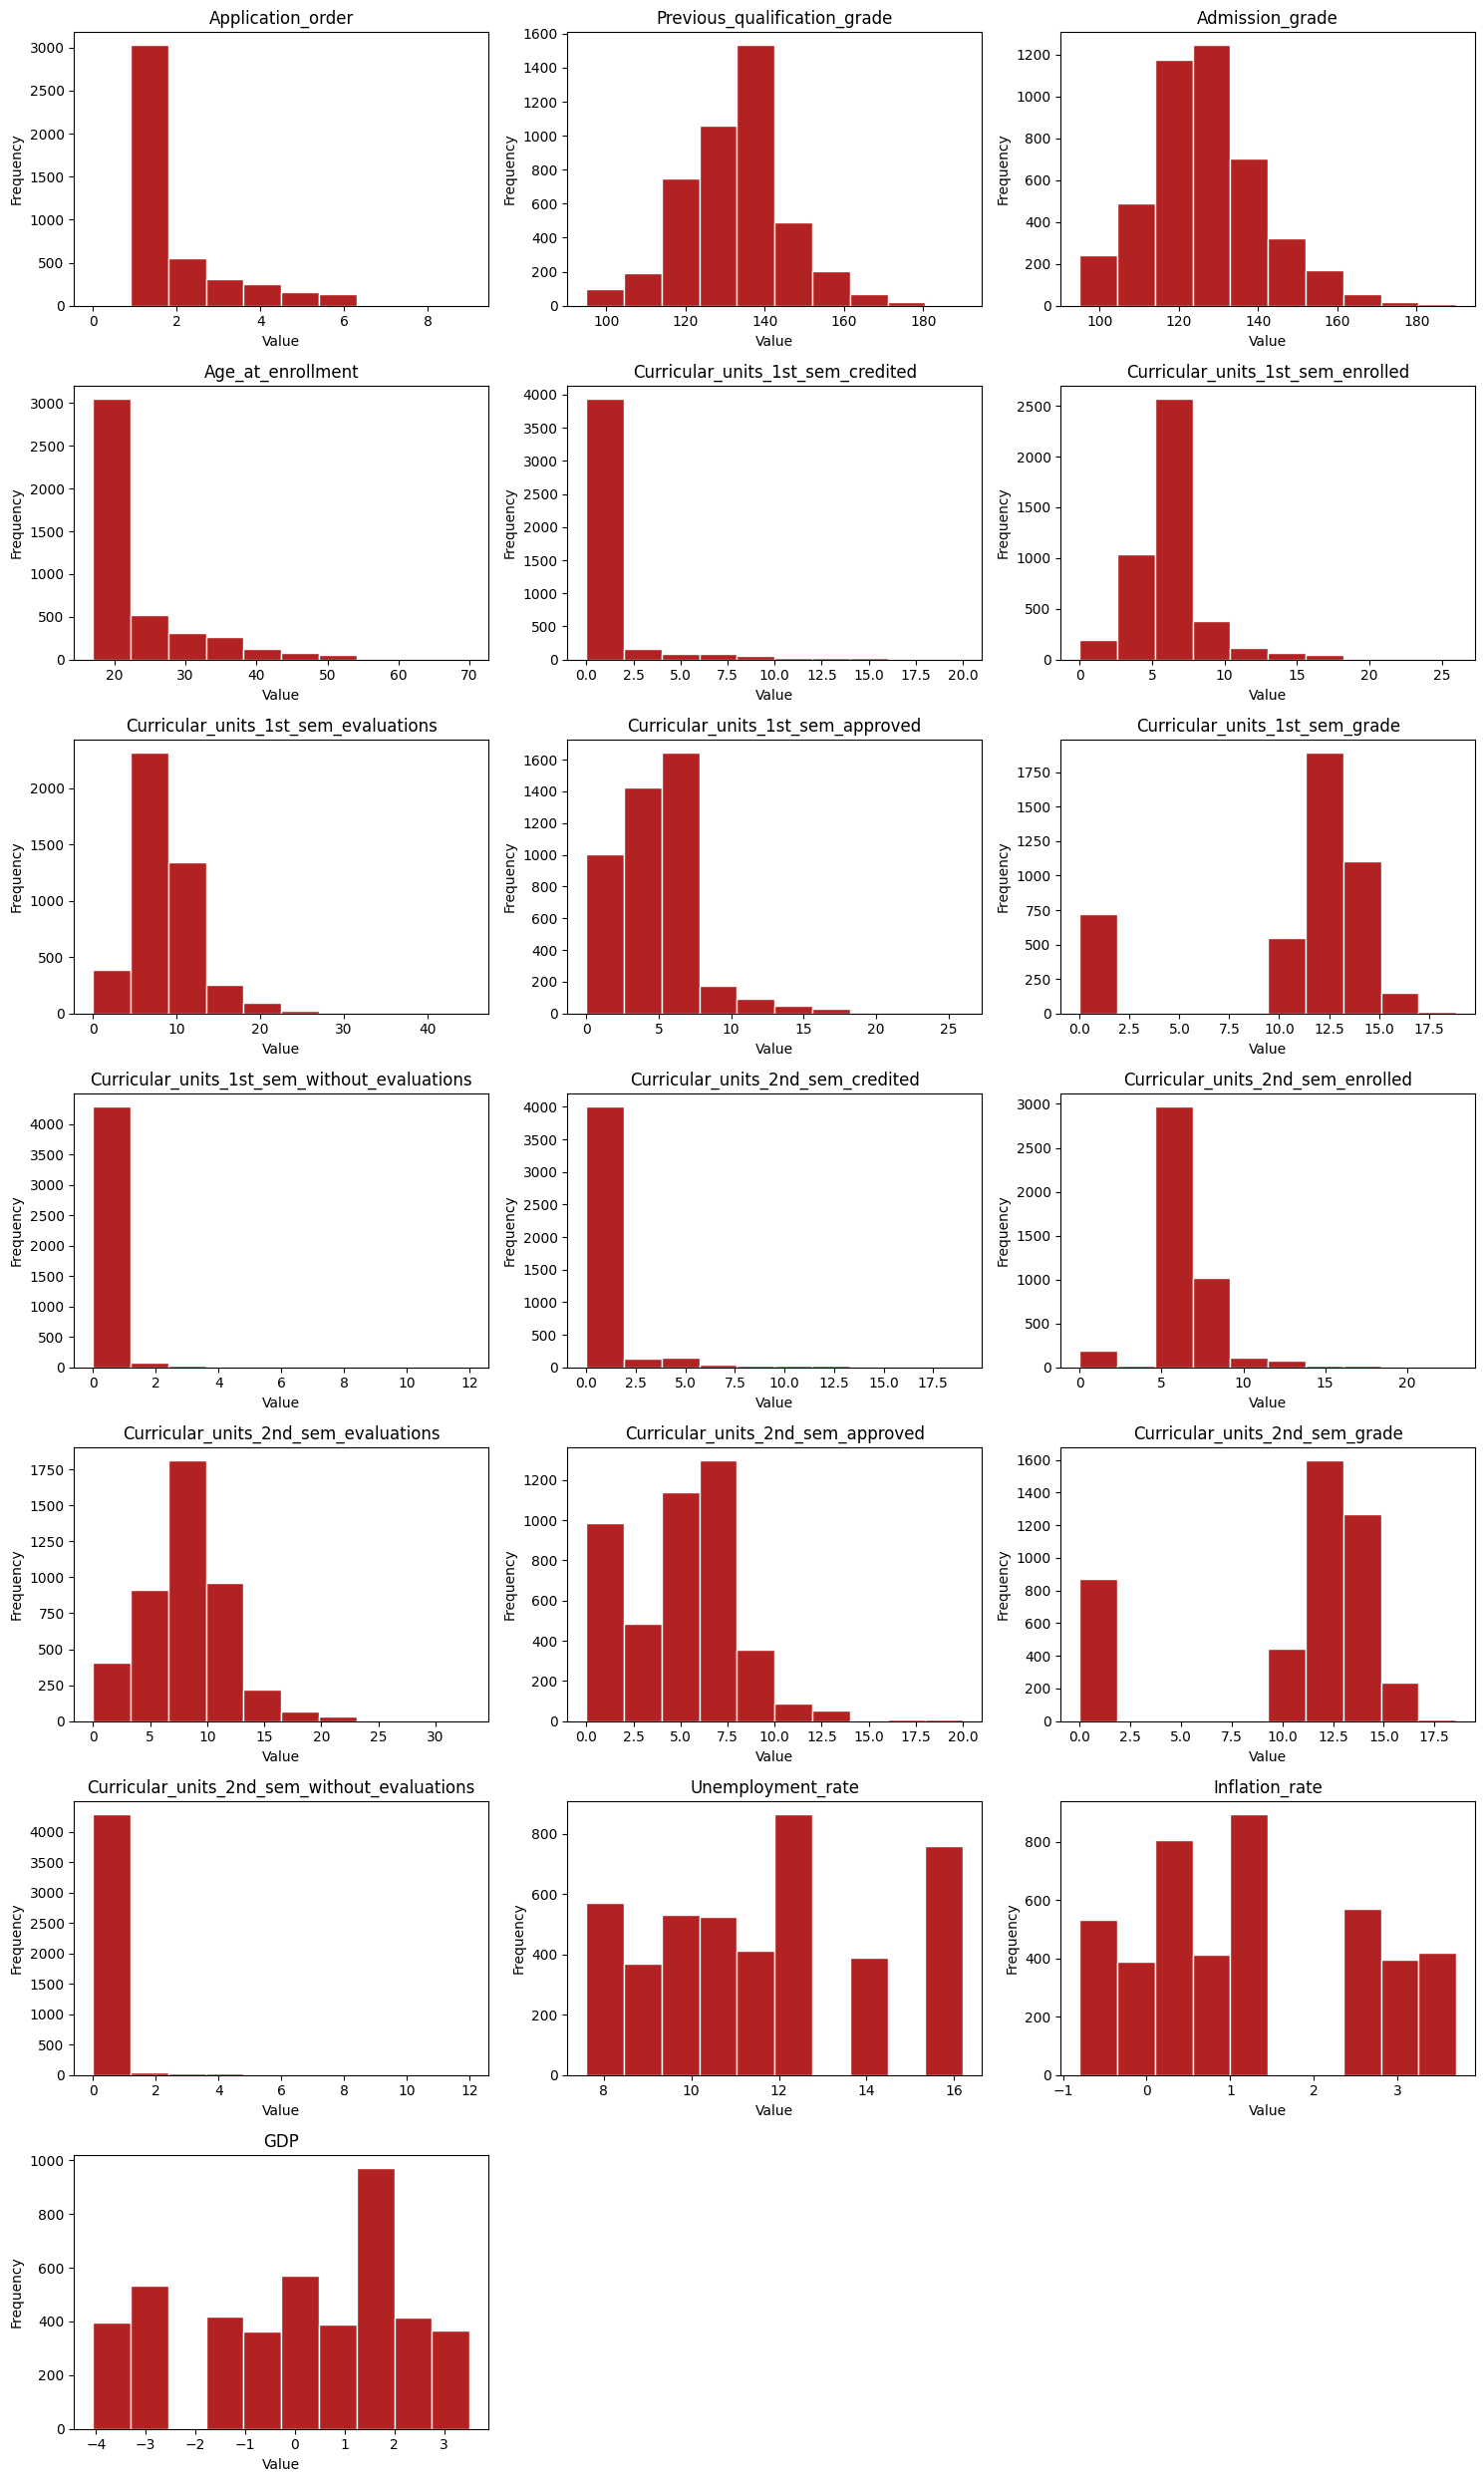

In [ ]:
# Histogram
# ukuran plot
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 25))

col_index = 0
for i in range(num_rows):
  for j in range(3):
    if col_index < num_cols:  # Check if col_index is within bounds
        col = df_num.columns[col_index]
        axs[i, j].hist(df_num[col], bins=10, color='firebrick', edgecolor='white')
        axs[i, j].set_title(col)
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Frequency')
        col_index += 1
    else:
        axs[i, j].axis('off')  # Hide unused subplots


plt.tight_layout()
plt.show()

#### Boxplot

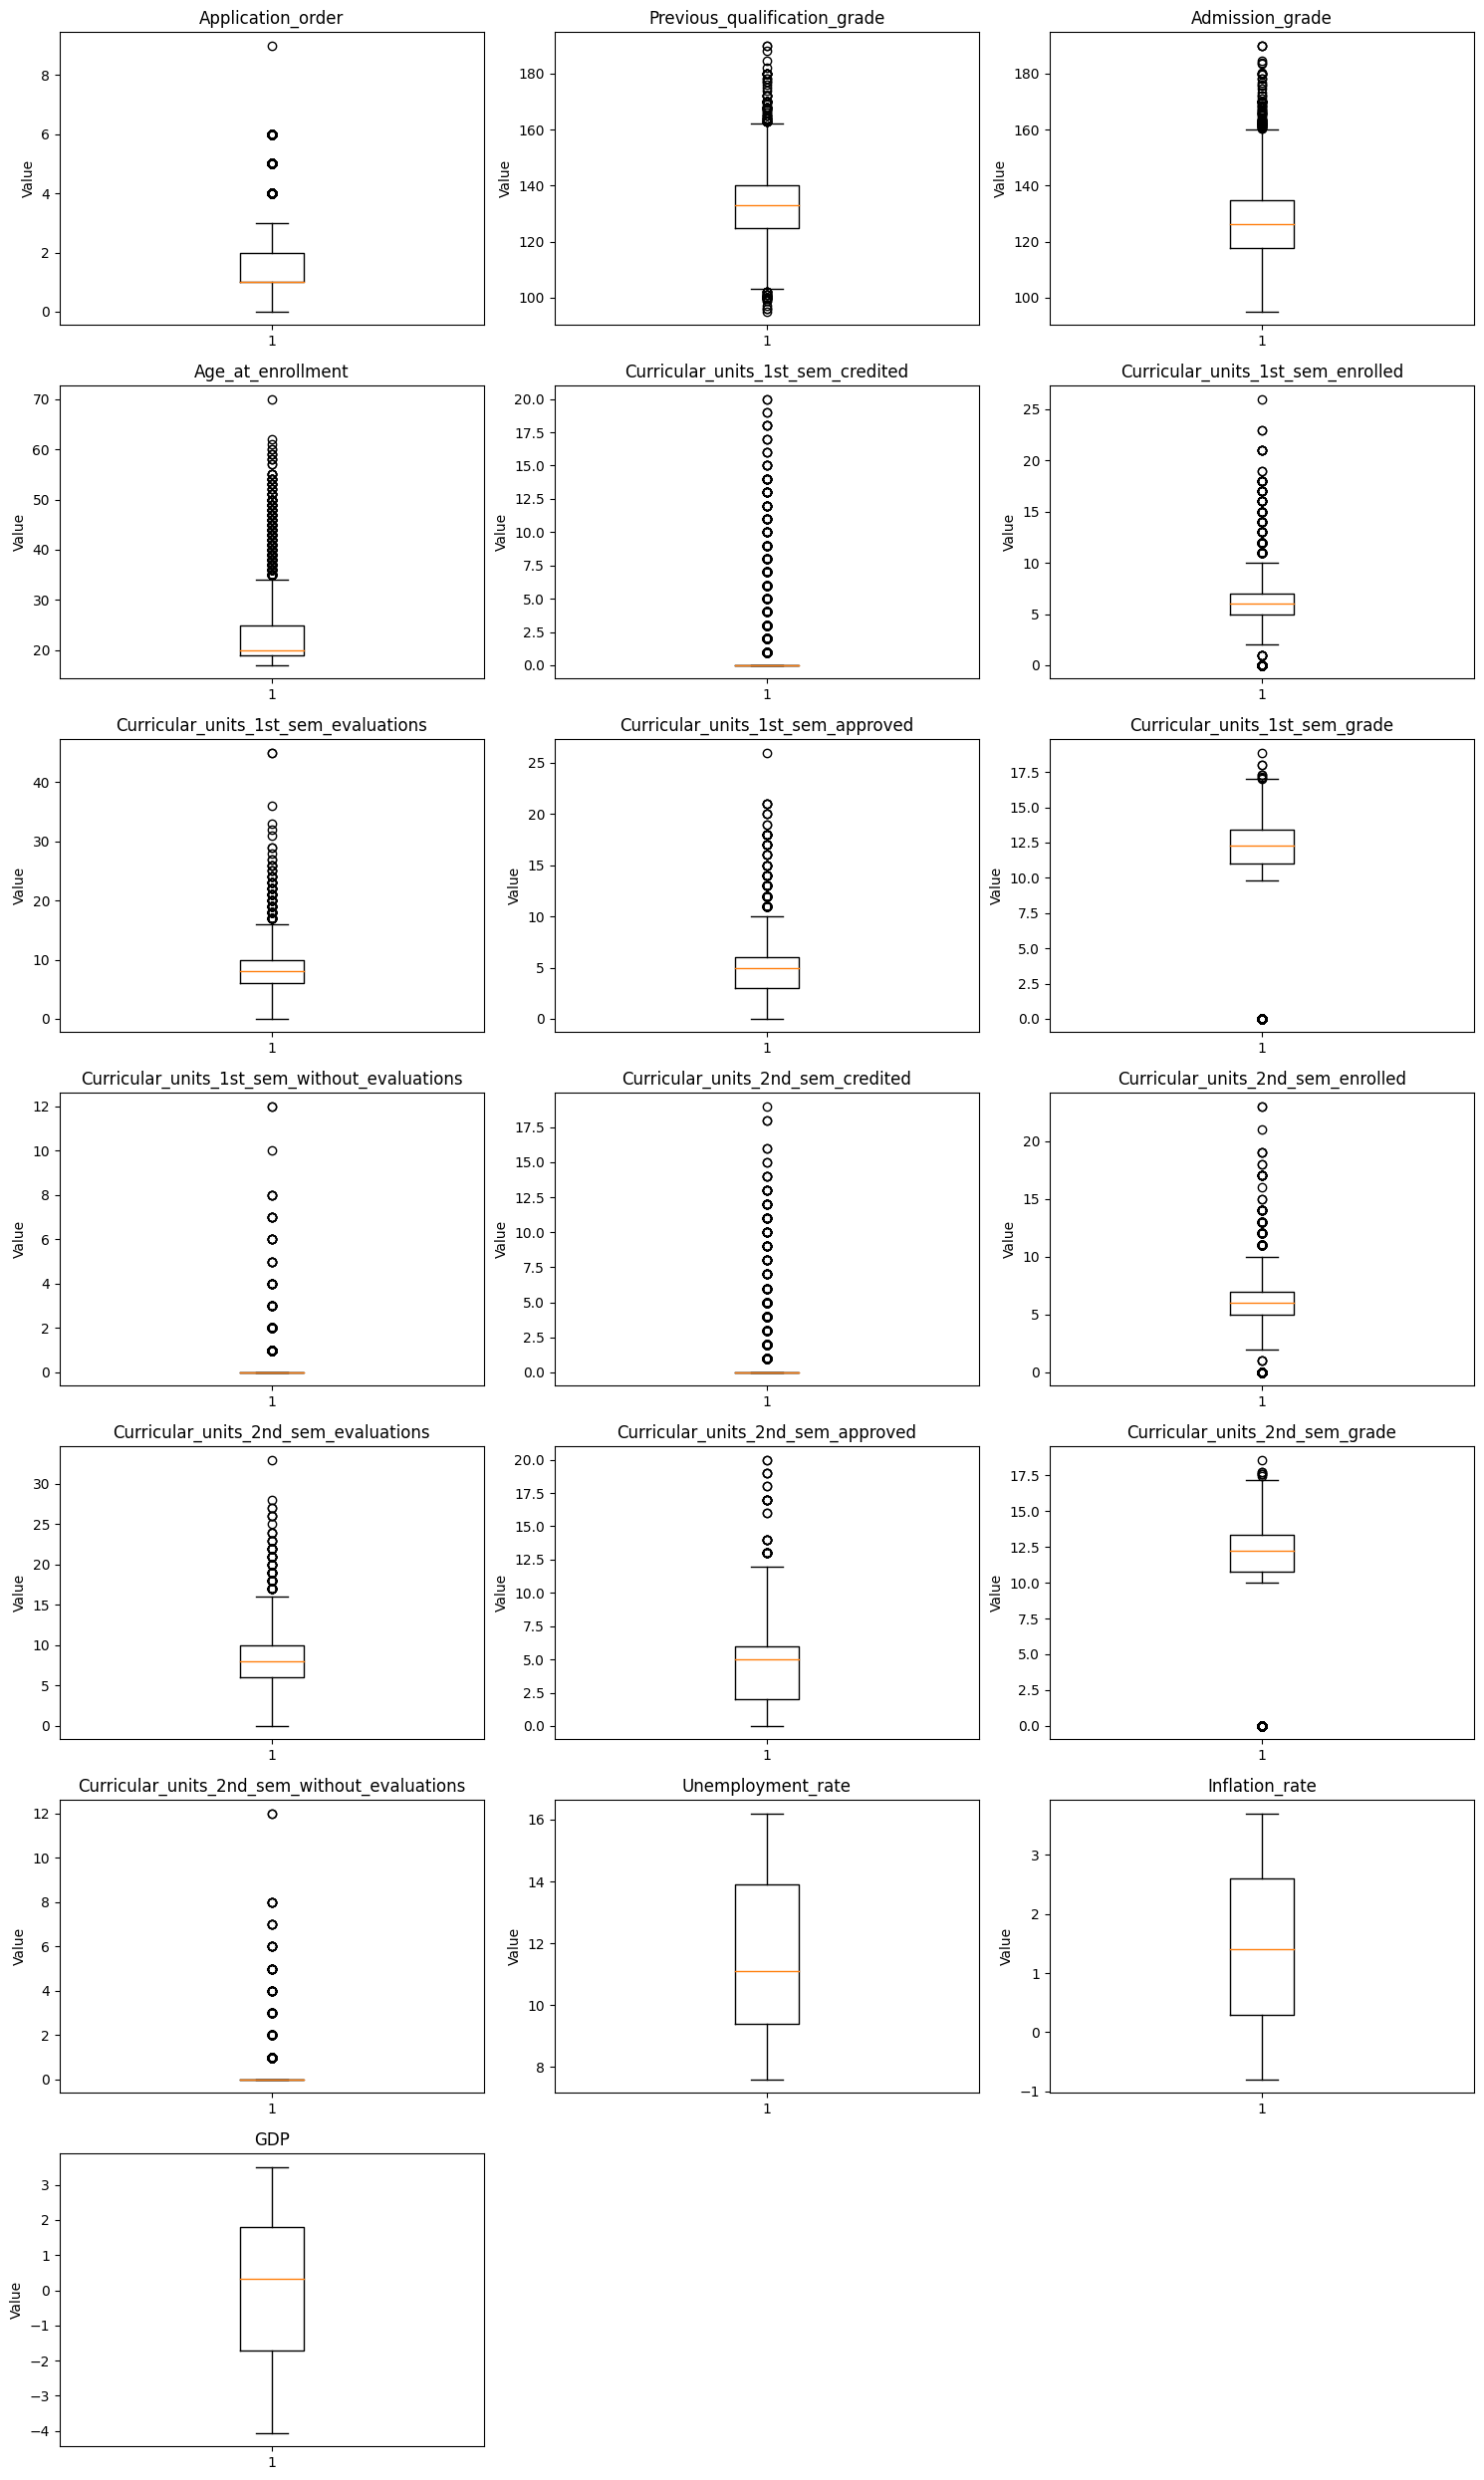

In [ ]:
# Boxplot
# ukuran plot
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 25))

col_index = 0
for i in range(num_rows):
  for j in range(3):
    if col_index < num_cols:  # Check if col_index is within bounds
      col = df_num.columns[col_index]
      axs[i, j].boxplot(df_num[col])
      axs[i, j].set_title(col)
      axs[i, j].set_ylabel('Value')
      col_index += 1
    else:
        axs[i, j].axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()

#### Pengecekan Outlier

In [ ]:
description = df_num.describe()

# Menambahkan IQR
iqr = description.loc['75%'] - description.loc['25%']
max_row = description.loc['max']
max_row.name = 'IQR'
description.loc['IQR'] = iqr

description

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000
IQR,1.000000,15.000000,16.900000,6.000000,0.000000,2.000000,4.000000,3.000000,2.400000,0.000000,0.000000,2.000000,4.000000,4.000000,2.583333,0.000000,4.500000,2.300000,3.490000


In [ ]:
# Hitung lower whisker dan upper whisker untuk setiap kolom
whiskers = {}
for col in df_num.columns:
    q1 = description.loc['25%', col]
    q3 = description.loc['75%', col]
    iqr = description.loc['IQR', col]
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    whiskers[col] = {'Lower Whisker': lower_whisker, 'Upper Whisker': upper_whisker}

# membuat dataframe
df_whiskers = pd.DataFrame.from_dict(whiskers, orient='index')
df_whiskers

,Lower Whisker,Upper Whisker
Application_order,-0.500,3.500000
Previous_qualification_grade,102.500,162.500000
Admission_grade,92.550,160.150000
Age_at_enrollment,10.000,34.000000
Curricular_units_1st_sem_credited,0.000,0.000000
Curricular_units_1st_sem_enrolled,2.000,10.000000
Curricular_units_1st_sem_evaluations,0.000,16.000000
Curricular_units_1st_sem_approved,-1.500,10.500000
Curricular_units_1st_sem_grade,7.400,17.000000
Curricular_units_1st_sem_without_evaluations,0.000,0.000000


In [ ]:
whiskers

{'Application_order': {'Lower Whisker': -0.5, 'Upper Whisker': 3.5},
 'Previous_qualification_grade': {'Lower Whisker': 102.5,
  'Upper Whisker': 162.5},
 'Admission_grade': {'Lower Whisker': 92.55,
  'Upper Whisker': 160.15000000000003},
 'Age_at_enrollment': {'Lower Whisker': 10.0, 'Upper Whisker': 34.0},
 'Curricular_units_1st_sem_credited': {'Lower Whisker': 0.0,
  'Upper Whisker': 0.0},
 'Curricular_units_1st_sem_enrolled': {'Lower Whisker': 2.0,
  'Upper Whisker': 10.0},
 'Curricular_units_1st_sem_evaluations': {'Lower Whisker': 0.0,
  'Upper Whisker': 16.0},
 'Curricular_units_1st_sem_approved': {'Lower Whisker': -1.5,
  'Upper Whisker': 10.5},
 'Curricular_units_1st_sem_grade': {'Lower Whisker': 7.3999999999999995,
  'Upper Whisker': 17.0},
 'Curricular_units_1st_sem_without_evaluations': {'Lower Whisker': 0.0,
  'Upper Whisker': 0.0},
 'Curricular_units_2nd_sem_credited': {'Lower Whisker': 0.0,
  'Upper Whisker': 0.0},
 'Curricular_units_2nd_sem_enrolled': {'Lower Whisker': 2.

In [ ]:
# Inisialisasi dictionary untuk menyimpan informasi outlier
outliers_info = {}

for col in df_num.columns:
    # deklarasi whiskers tiap kolom
    lower_whiskers = whiskers[col]['Lower Whisker']
    upper_whiskers = whiskers[col]['Upper Whisker']

    # Mengidentifikasi outlier
    outliers = df_num[(df_num[col] < lower_whiskers) | (df_num[col] > upper_whiskers)][col]

    # Menghitung jumlah outlier
    outlier_count = outliers.count()

    # Menghitung proporsi outlier
    total_count = df_num[col].count()
    outlier_proportion = round((outlier_count / total_count) * 100, 2)

    # Mengurutkan unique outliers
    unique_outliers = outliers.unique()
    unique_outliers.sort()

    outliers_info[col] = {'Count': outlier_count, 'Proportion': outlier_proportion, 'Outliers': unique_outliers}

# Membuat DataFrame dari outliers_info
df_outliers = pd.DataFrame.from_dict(outliers_info, orient='index')

# Menampilkan DataFrame
df_outliers

,Count,Proportion,Outliers
Application_order,541,12.23,"[4, 5, 6, 9]"
Previous_qualification_grade,179,4.05,"[95.0, 96.0, 97.0, 99.0, 100.0, 101.0, 102.0, ..."
Admission_grade,86,1.94,"[160.4, 160.5, 160.6, 161.0, 161.1, 161.2, 161..."
Age_at_enrollment,441,9.97,"[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 4..."
Curricular_units_1st_sem_credited,577,13.04,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Curricular_units_1st_sem_enrolled,424,9.58,"[0, 1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21,..."
Curricular_units_1st_sem_evaluations,158,3.57,"[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2..."
Curricular_units_1st_sem_approved,180,4.07,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26]"
Curricular_units_1st_sem_grade,726,16.41,"[0.0, 17.005555555555556, 17.11111111111111, 1..."
Curricular_units_1st_sem_without_evaluations,294,6.65,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 12]"


Berdasarkan analisis chart dan data outlier, berikut beberapa insight terbaik untuk setiap fitur:

* Application_order:
Mayoritas mahasiswa mendaftar sebagai pilihan pertama atau kedua, menunjukkan institusi ini cenderung menjadi pilihan utama. Outlier di urutan 4-9 mungkin menandakan mahasiswa yang mendaftar sebagai pilihan cadangan.
* Previous_qualification_grade:
Distribusi nilai kualifikasi sebelumnya cukup normal, dengan median sekitar 135. Outlier di bawah 100 mungkin mengindikasikan kebijakan penerimaan khusus atau jalur alternatif.
* Admission_grade:
Nilai masuk terdistribusi normal dengan median sekitar 130. Outlier di atas 160 bisa menandakan mahasiswa berprestasi tinggi yang mungkin memerlukan program khusus.
* Age_at_enrollment:
Mayoritas mahasiswa berusia 18-25 tahun, namun ada 9.97% outlier mahasiswa yang lebih tua. Ini menunjukkan potensi untuk program khusus bagi mahasiswa dewasa atau kelas malam.

* 5-6. Curricular_units_1st_sem_credited & enrolled:
Kebanyakan mahasiswa mengambil 5-7 unit. Outlier yang mengambil lebih banyak unit mungkin mahasiswa percepatan, sementara yang lebih sedikit mungkin mahasiswa paruh waktu.
* 7-9. Curricular_units_1st_sem_evaluations, approved, & grade:
Ada variasi besar dalam jumlah evaluasi dan unit yang disetujui. Distribusi nilai bimodal menunjukkan potensi adanya dua kelompok mahasiswa dengan kinerja berbeda.

* Curricular_units_1st_sem_without_evaluations:
Mayoritas mahasiswa menyelesaikan semua evaluasi. Outlier dengan banyak unit tanpa evaluasi mungkin mengindikasikan masalah administratif atau personal.

* 11-16. Fitur semester kedua:
Pola serupa dengan semester pertama, namun dengan sedikit penurunan dalam unit yang diambil dan disetujui. Ini bisa menandakan beban akademik yang lebih berat atau penyesuaian ekspektasi mahasiswa.

* Unemployment_rate:
Variasi tingkat pengangguran menunjukkan data mungkin mencakup beberapa tahun atau daerah berbeda. Ini bisa mempengaruhi motivasi dan pilihan studi mahasiswa.
* Inflation_rate:
Distribusi inflasi yang condong ke kanan bisa mempengaruhi biaya hidup mahasiswa dan potensial dropout karena alasan finansial.
* GDP:
Distribusi GDP yang cukup merata menunjukkan data mungkin mencakup periode ekonomi yang beragam, yang bisa mempengaruhi prospek kerja lulusan.

### Univariate Kategorikal

#### Bar Chart

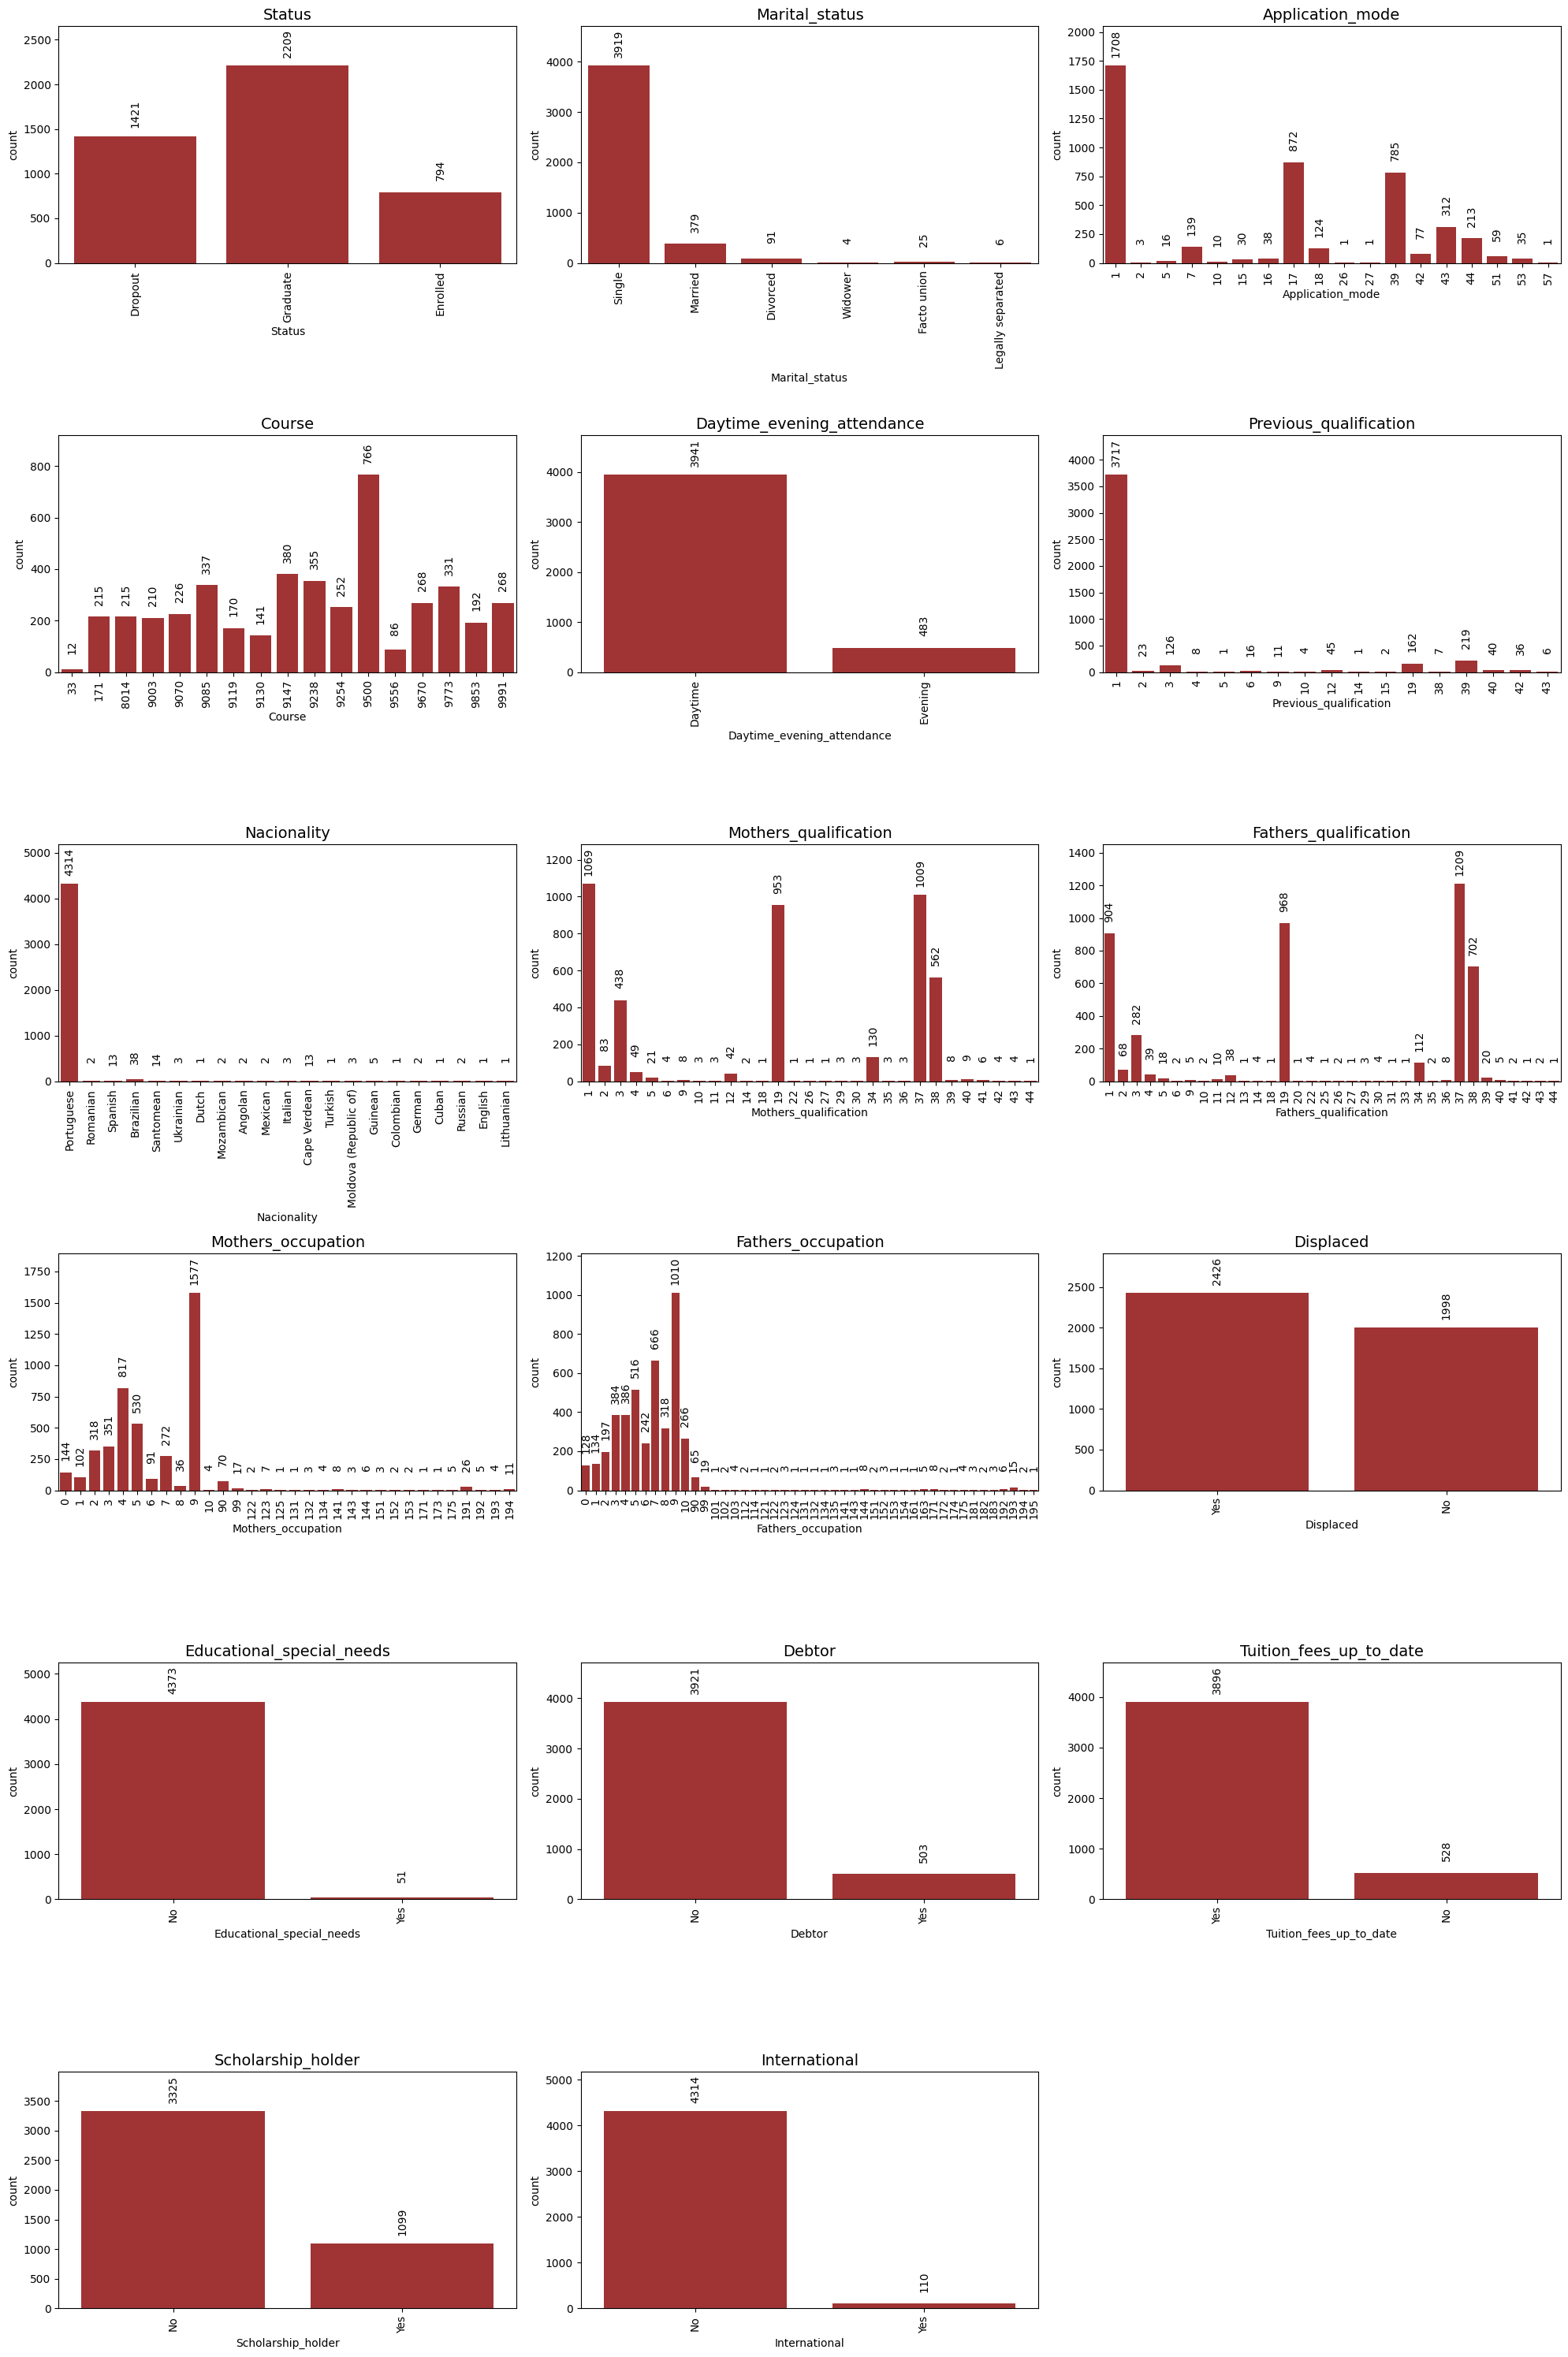

In [ ]:
# Set figure size larger to accommodate long labels
plt.figure(figsize=(20, 30))

for i, col in enumerate(df_cat.columns):
    plt.subplot(6, 3, i+1)
    ax = sns.countplot(data=df_cat, x=col, color='firebrick')
    plt.title(f'{col}', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-tick labels

    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                    textcoords='offset points', rotation=90)  # Rotate annotation text to vertical

    # Set y-axis limit higher to provide space for labels
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.2)  # Add 20% padding on top

plt.tight_layout()
plt.show()

Berdasarkan analisis chart diatas, berikut beberapa insight terbaik untuk setiap fitur:

* Status:
  * Jumlah mahasiswa yang sudah lulus (Graduated) adalah yang tertinggi (2326), diikuti oleh mahasiswa yang masih aktif (Enrolled) (1421).
  * Terdapat sejumlah mahasiswa yang drop out (725).

* Marital Status:
  * Sebagian besar mahasiswa berstatus lajang (Single) (3313).
  * Jumlah mahasiswa yang sudah menikah (Married) adalah 270, sementara ada beberapa yang sudah bercerai (4) atau berstatus janda/duda (6).

* Application Mode:
  * Mode aplikasi terbanyak adalah melalui 1, 2, dan 3 dengan jumlah masing-masing 129, 672, dan 738.
  * Mode aplikasi lainnya memiliki jumlah yang lebih sedikit, menunjukkan preferensi yang jelas terhadap mode tertentu.

* Course:
  * Program studi dengan jumlah mahasiswa terbanyak adalah Informatics Engineering (9119) dengan 346 mahasiswa, diikuti oleh Management (9147) dengan 296 mahasiswa.
  * Beberapa program studi memiliki jumlah mahasiswa yang sangat sedikit, seperti Equinculture (9130) dan Animation and Multimedia Design (171).

* Daytime/Evening Attendance:
  * Sebagian besar mahasiswa mengikuti kuliah pada siang hari (2941), sementara yang mengikuti pada malam hari jauh lebih sedikit (418).

* Previous Qualification:
  * Sebagian besar mahasiswa memiliki kualifikasi sebelumnya dari pendidikan menengah (Secondary education) (3417).
  * Ada sejumlah mahasiswa dengan kualifikasi sebelumnya dari pendidikan tinggi (Higher education - bachelor's degree) (33) dan lainnya.

* Nationality:
  * Mayoritas mahasiswa adalah berkebangsaan Portugis (4621).
  * Ada juga sejumlah mahasiswa dari berbagai negara lain seperti Brazil (Brazilian) (41) dan Cape Verde (Cape Verdean) (22).

* Mother's Qualification:
  * Kualifikasi ibu terbanyak adalah "Unknown" (2000), diikuti oleh "Basic Education 1st Cycle" (492) dan "Secondary Education - 12th Year of Schooling or Eq." (423).

* Father's Qualification:
  * Pola kualifikasi ayah mirip dengan ibu, dengan "Unknown" (1970) dan "Basic Education 1st Cycle" (466) yang dominan.

* Mother's Occupation:
  * Pekerjaan ibu terbanyak adalah "Unskilled Workers" (271) dan "Unknown" (817).
  * Ada juga sejumlah ibu yang bekerja sebagai "Specialists in Intellectual and Scientific Activities" (299).

* Father's Occupation:
  * Pekerjaan ayah juga didominasi oleh "Unknown" (1012) dan "Unskilled Workers" (466).
  * Ada sejumlah ayah yang bekerja sebagai "Specialists in Intellectual and Scientific Activities" (302).

* Displaced:
  * Mayoritas mahasiswa tidak termasuk kategori "Displaced" (2636), sementara 723 termasuk kategori tersebut.

* Educational Special Needs:
  * Sebagian besar mahasiswa tidak memiliki kebutuhan khusus dalam pendidikan (4372), sementara 51 memiliki kebutuhan khusus.

* Debtor:
  * Sebagian besar mahasiswa tidak memiliki utang (3751), sementara 508 memiliki utang.

* Tuition Fees Up to Date:
  * Mayoritas mahasiswa membayar biaya kuliah tepat waktu (3991), sementara 268 tidak membayar tepat waktu.

* Scholarship Holder:
  * Sebagian besar mahasiswa tidak menerima beasiswa (3025), sementara 1190 menerima beasiswa.

* International:
  * Mayoritas mahasiswa bukan mahasiswa internasional (4321), sementara 110 adalah mahasiswa internasional.

### Multivariate w/ Status

#### Boxplot

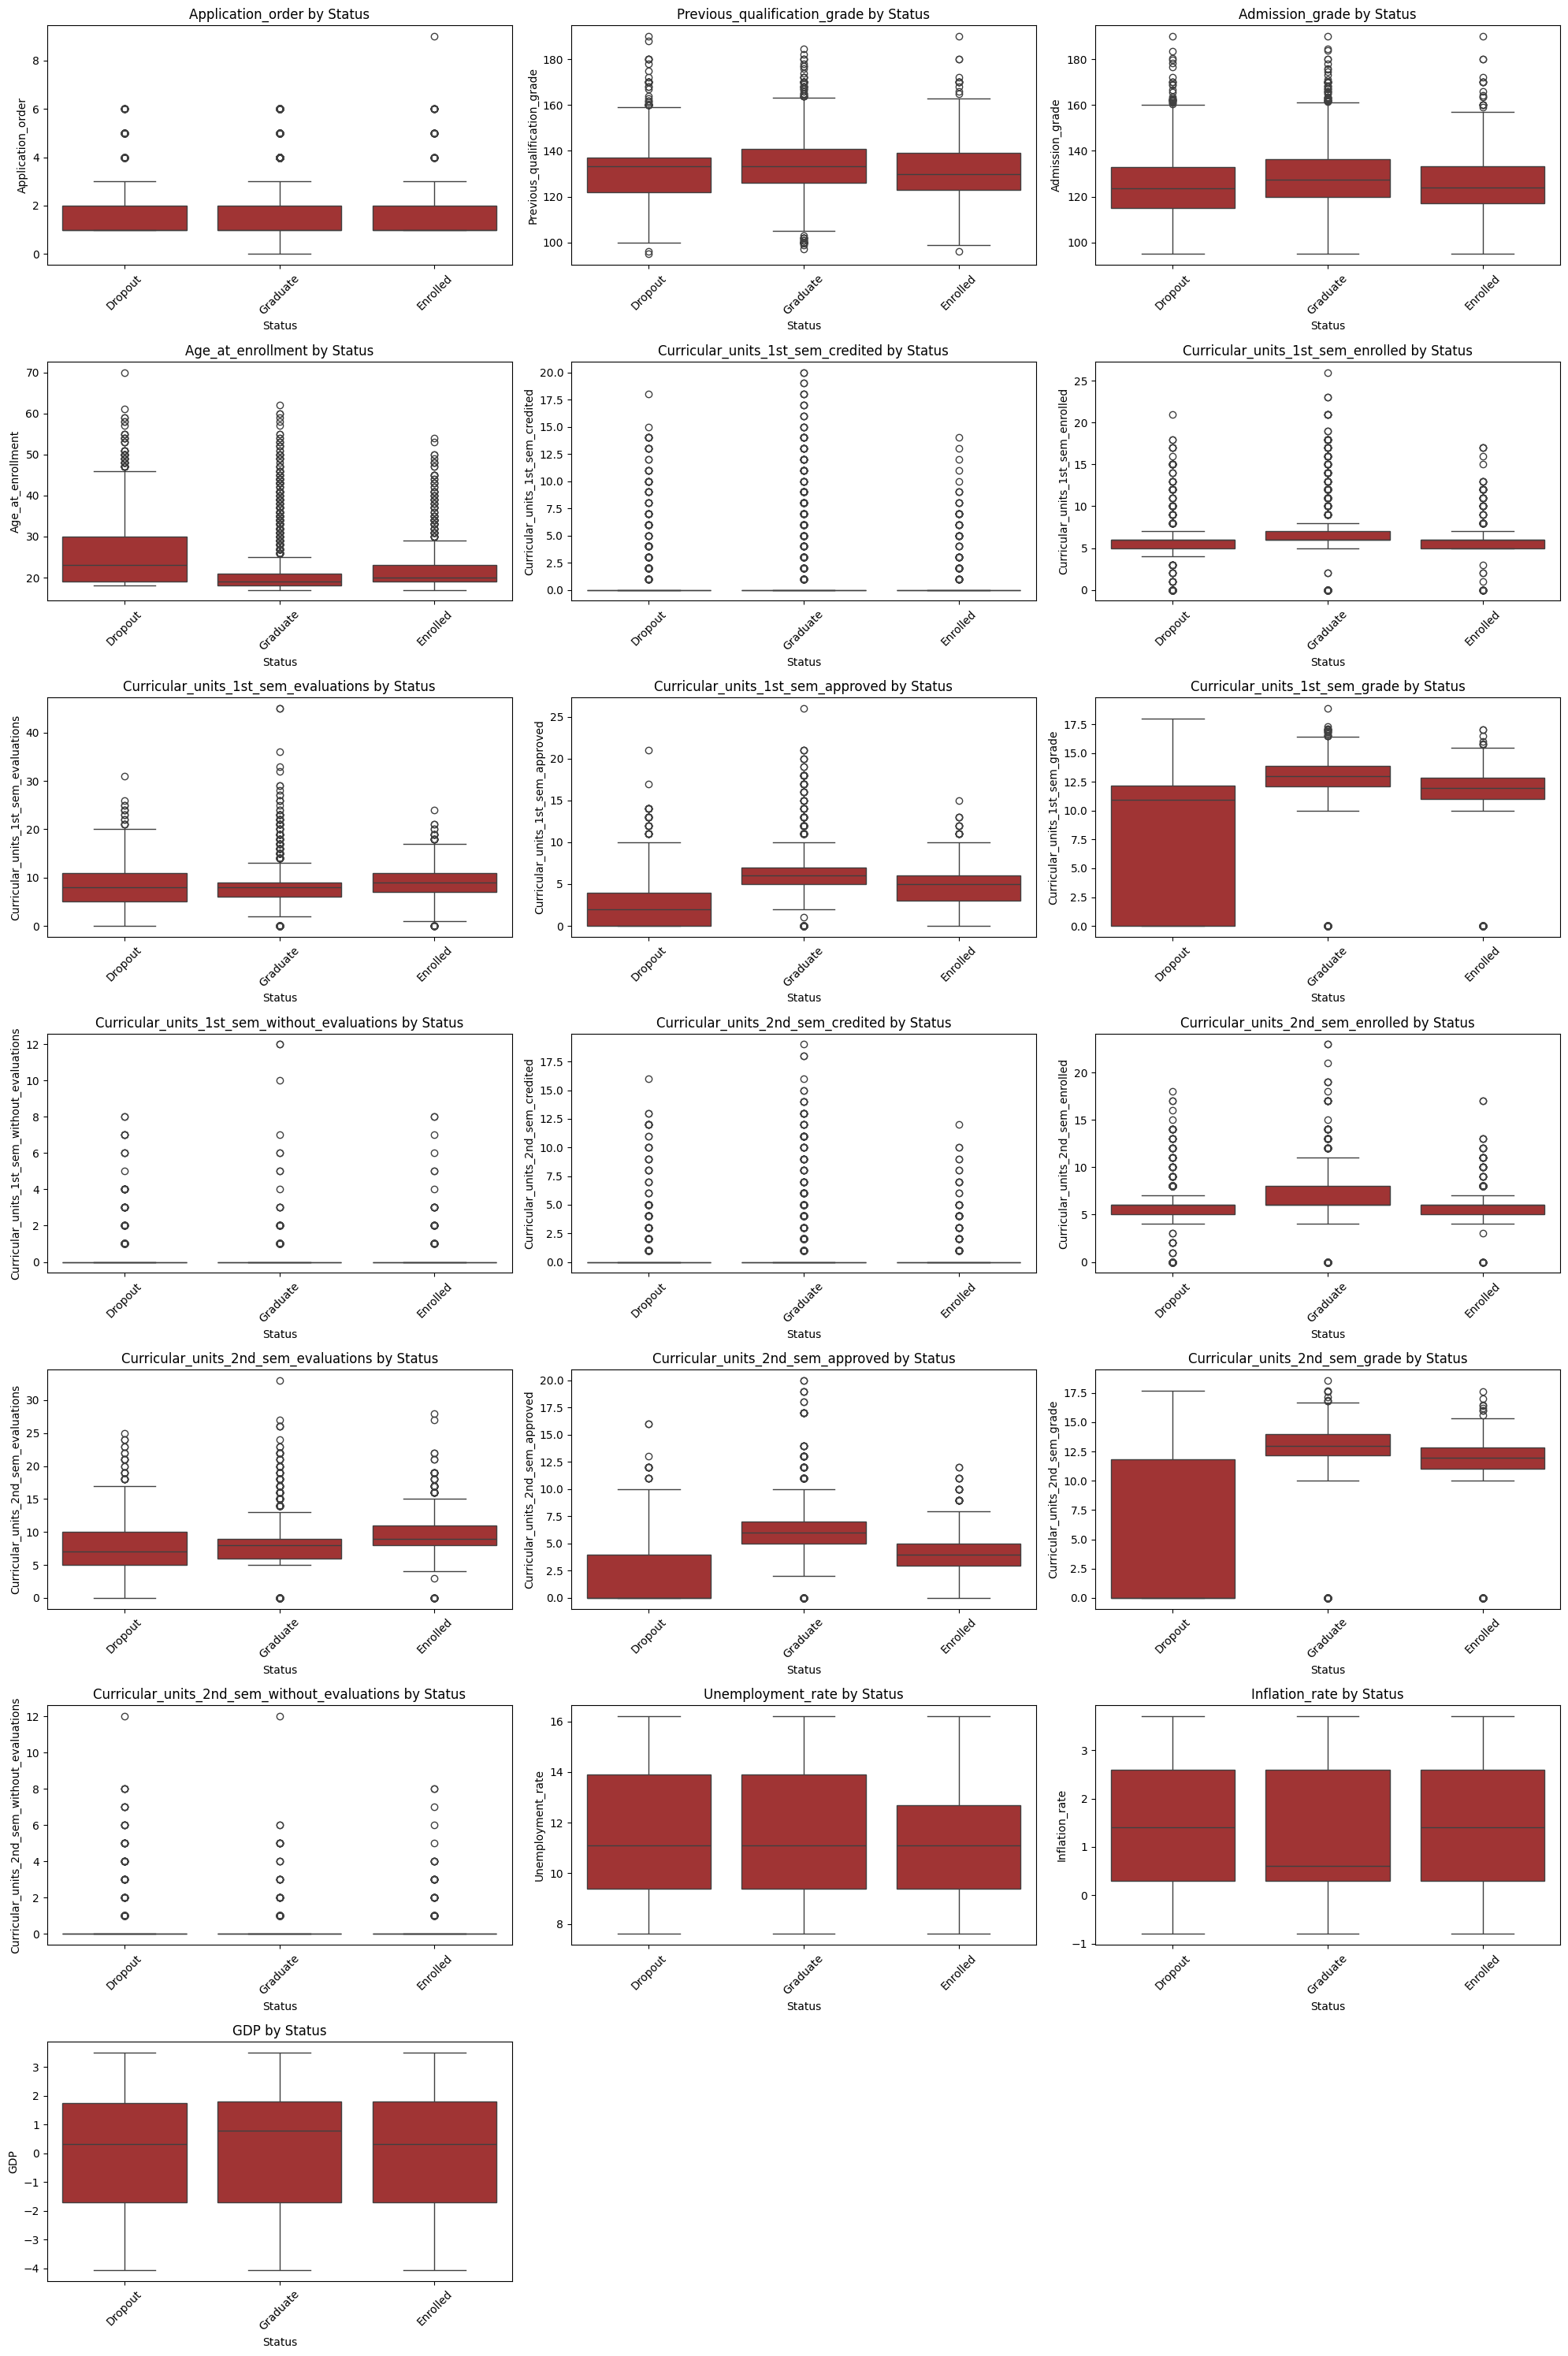

In [ ]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(df_num.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(x='Status', y=col, data=df_viz, color='firebrick')
    plt.title(f'{col} by Status')
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Berdasarkan hasil analisis diatas terdapat beberapa insight sebagai berikut:

* Karyawan yang meninggalkan perusahaan (Yes) cenderung lebih muda dibandingkan yang bertahan (No).
Median usia untuk attrition 'Yes' lebih rendah dibandingkan 'No'.
* Tidak terlihat perbedaan yang signifikan dalam daily rate antara kelompok attrition.
* Karyawan dengan attrition 'Yes' cenderung memiliki jarak dari rumah yang sedikit lebih jauh.
Terdapat beberapa outlier dengan jarak yang sangat jauh, terutama pada kelompok 'No'.
* EmployeeCount by Attrition: Tidak ada variasi yang terlihat, semua nilai sama.
* HourlyRate by Attrition: Tidak terlihat perbedaan yang signifikan dalam hourly rate antara kelompok attrition.
* Karyawan yang bertahan (No) cenderung memiliki pendapatan bulanan yang lebih tinggi. Terdapat banyak outlier dengan pendapatan tinggi, terutama pada kelompok 'No'.
* MonthlyRate by Attrition: Tidak terlihat perbedaan yang signifikan dalam monthly rate antara kelompok attrition.
* Karyawan dengan attrition 'Yes' cenderung telah bekerja di lebih banyak perusahaan sebelumnya.
* PercentSalaryHike by Attrition: Tidak terlihat perbedaan yang signifikan dalam persentase kenaikan gaji antara kelompok attrition.
* StandardHours by Attrition: Tidak ada variasi yang terlihat, semua nilai sama.
* Karyawan yang bertahan (No) cenderung memiliki total tahun kerja yang lebih lama.
Terdapat beberapa outlier dengan masa kerja yang sangat lama.
* Karyawan yang bertahan (No) cenderung memiliki sedikit lebih banyak waktu pelatihan.
* Karyawan yang bertahan (No) cenderung memiliki masa kerja yang lebih lama di perusahaan. Terdapat beberapa outlier dengan masa kerja yang sangat lama.
* Karyawan yang bertahan (No) cenderung memiliki masa kerja yang lebih lama dalam peran saat ini.
* YearsSinceLastPromotion by Attrition: Tidak terlihat perbedaan yang signifikan dalam waktu sejak promosi terakhir antara kelompok attrition. Terdapat beberapa outlier dengan waktu yang sangat lama sejak promosi terakhir.
* Karyawan yang bertahan (No) cenderung memiliki masa kerja yang sedikit lebih lama dengan manajer saat ini.

#### Heatmap

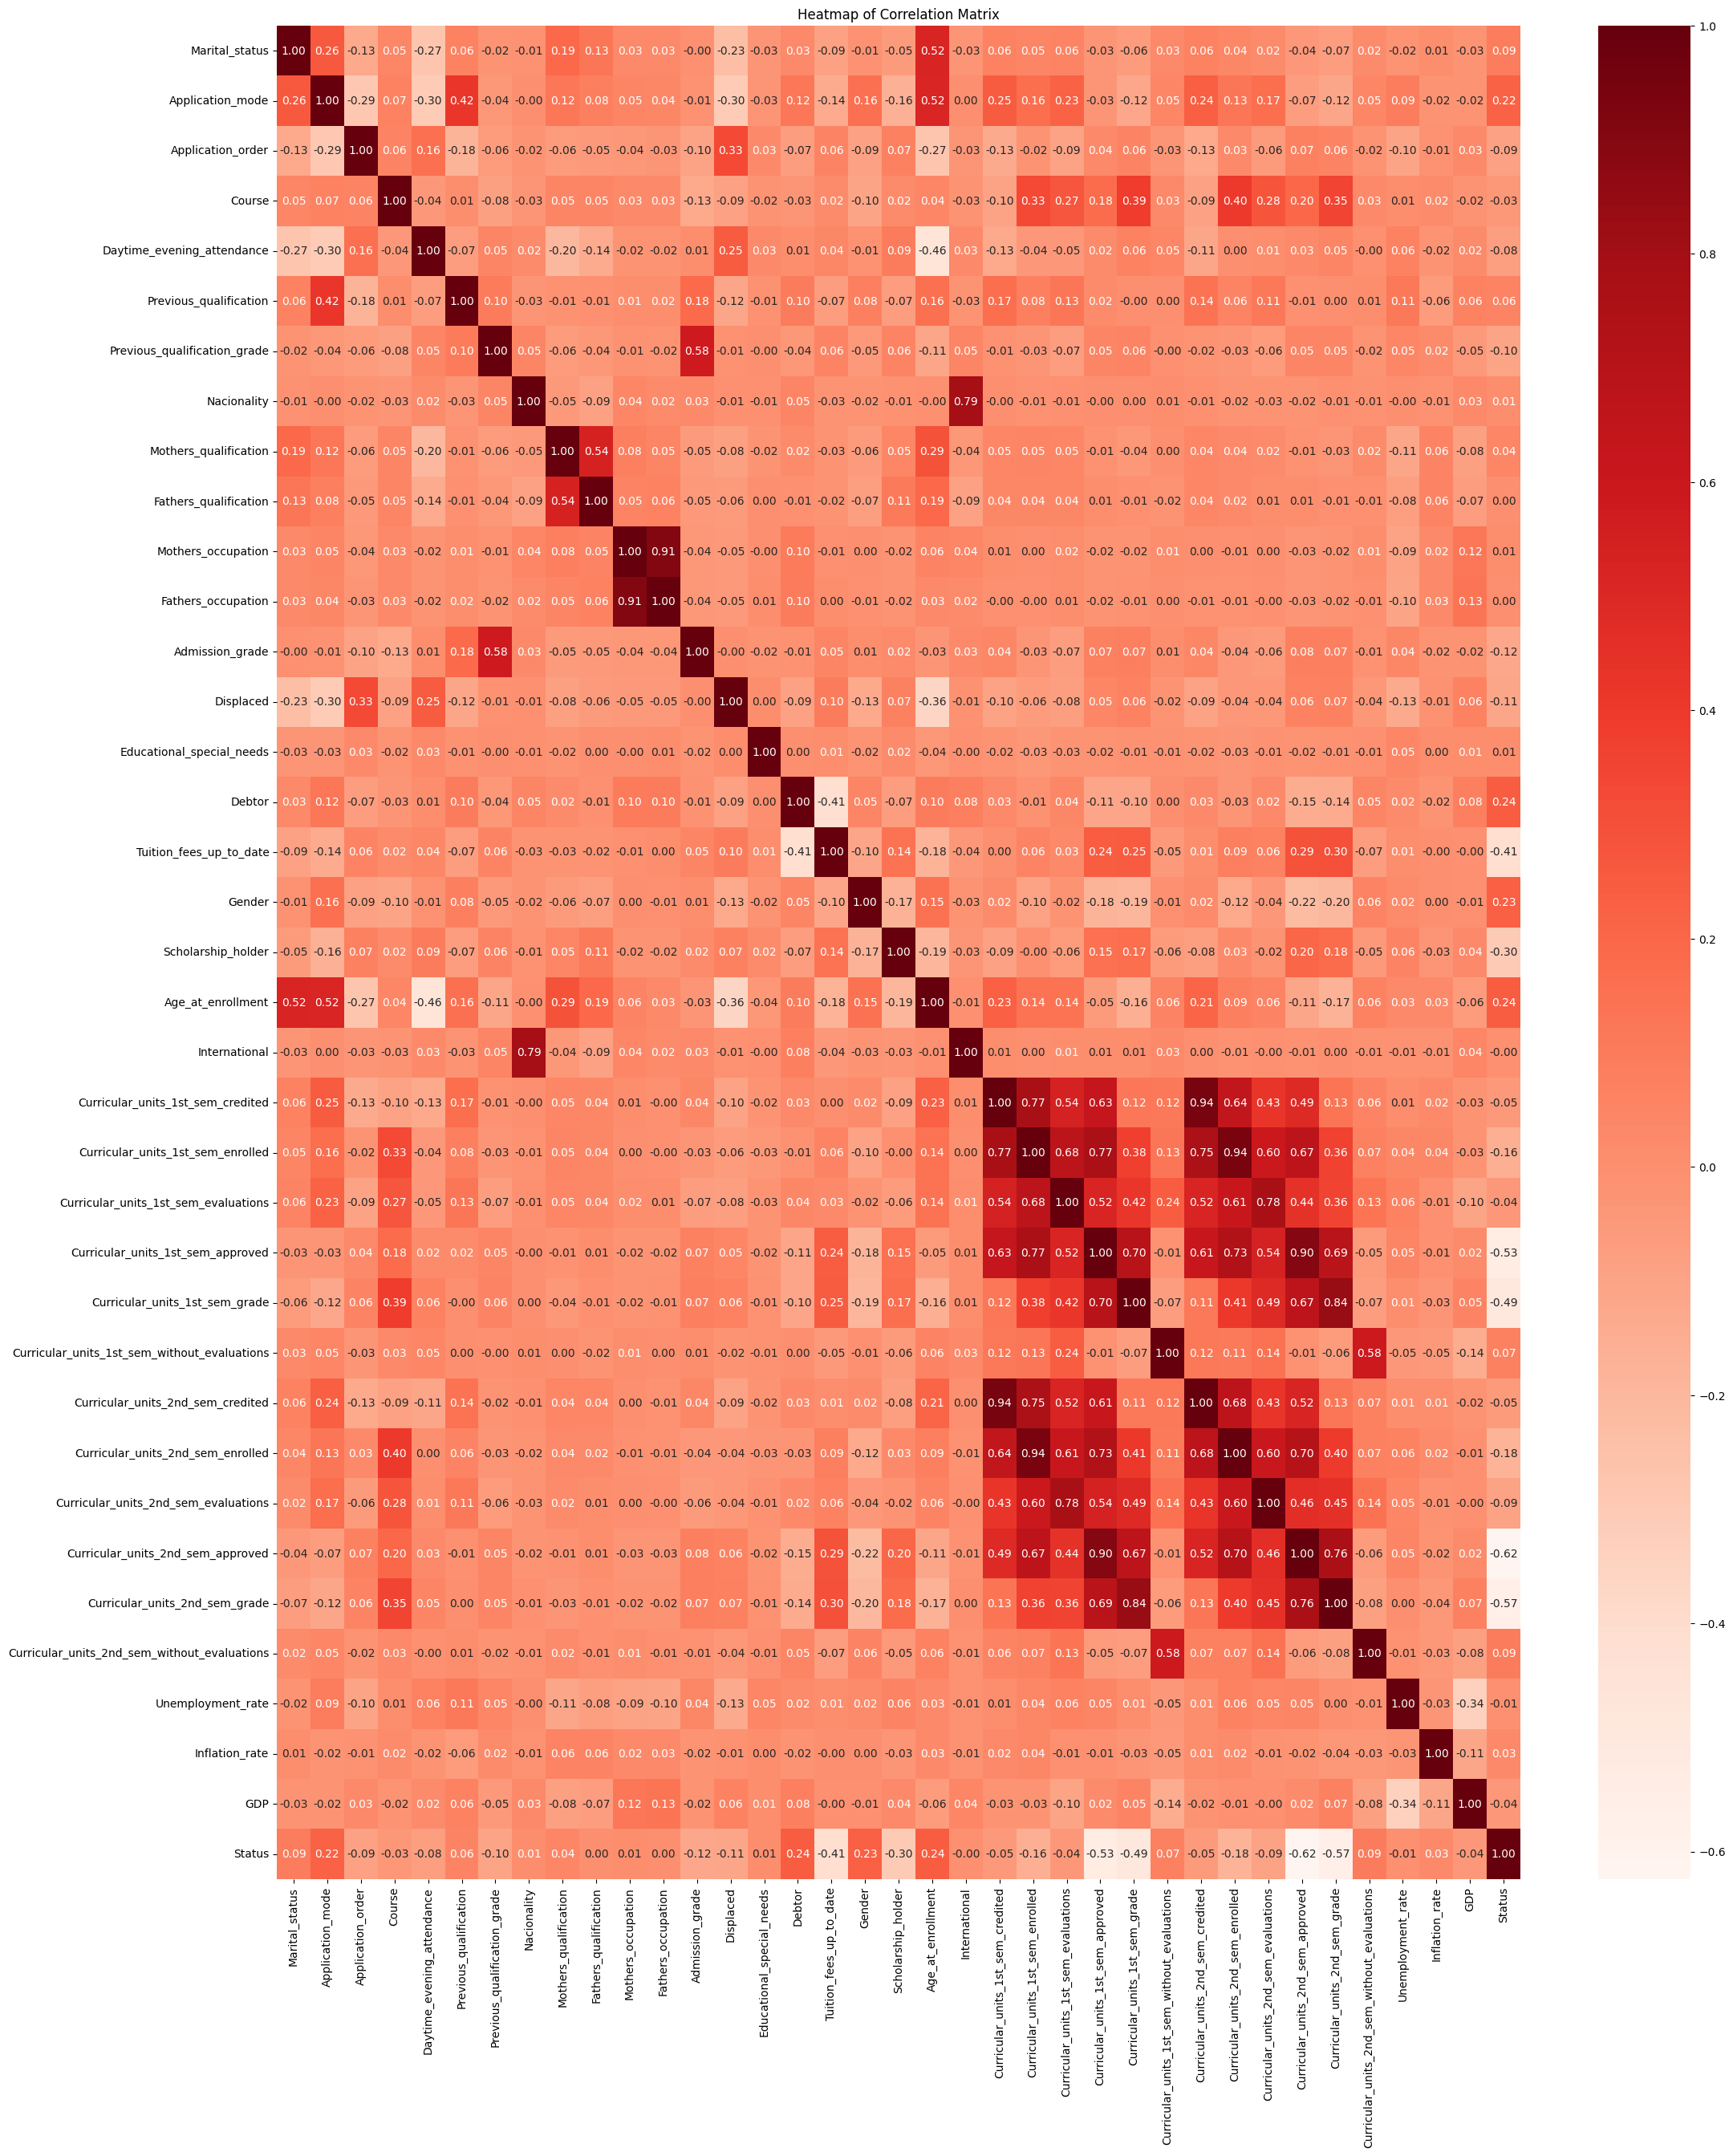

In [ ]:
# Encode 'Status' column to integers
df_corr = df.copy()
df_corr['Status'] = df_corr['Status'].map({'Graduate': 0, 'Enrolled': 1, 'Dropout':2})

# Calculate the correlation matrix
corr = df_corr.select_dtypes(include=[int, float]).corr()

# Create a heatmap
plt.figure(figsize=(25, 30))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f") # Use Reds colormap
plt.title('Heatmap of Correlation Matrix')
plt.show()

Berdasarkan matriks korelasi diatas didapatkan beberapa insigth seperti:

* Korelasi Positif Tertinggi dengan Status:
  * Curricular_units_1st_sem_credited (0.39): Ini menunjukkan bahwa semakin banyak mata kuliah yang berhasil dikreditkan pada semester pertama, semakin tinggi kemungkinan status kelulusan yang positif.
  * Curricular_units_1st_sem_approved (0.37): Serupa dengan poin sebelumnya, jumlah mata kuliah yang disetujui pada semester pertama berkorelasi positif dengan status kelulusan.
  * Admission_grade (0.32): Nilai penerimaan yang lebih tinggi cenderung berkorelasi dengan status kelulusan yang lebih baik.

* Korelasi Negatif Tertinggi dengan Status:
  * Curricular_units_1st_sem_without_evaluations (-0.29): Semakin banyak mata kuliah tanpa evaluasi pada semester pertama, semakin rendah kemungkinan status kelulusan yang positif.
  * Application_order (-0.22): Urutan aplikasi yang lebih tinggi (artinya mendaftar lebih belakangan) cenderung berkorelasi negatif dengan status kelulusan.
  * Age_at_enrollment (-0.21): Usia saat mendaftar yang lebih tinggi sedikit berkorelasi negatif dengan status kelulusan.

* Atribut dengan Korelasi Rendah/Tidak Berpengaruh terhadap Status:
  * Nationality (0.01): Kewarganegaraan hampir tidak memiliki korelasi dengan status kelulusan.
  * Gender (-0.04): Jenis kelamin memiliki korelasi yang sangat rendah dengan status kelulusan.
  * Unemployment_rate (-0.05), Inflation_rate (-0.03), GDP (-0.04): Faktor ekonomi makro memiliki korelasi yang sangat rendah dengan status kelulusan individual.

* Kesimpulan:
  * Faktor akademik, terutama kinerja pada semester pertama, memiliki korelasi terkuat dengan status kelulusan.
  * Nilai penerimaan awal juga cukup berpengaruh.
  * Faktor demografis seperti kewarganegaraan dan jenis kelamin, serta faktor ekonomi makro, memiliki pengaruh yang sangat kecil terhadap status kelulusan.
  * Usia saat mendaftar dan urutan aplikasi memiliki korelasi negatif kecil, menunjukkan mahasiswa yang lebih muda dan mendaftar lebih awal mungkin memiliki sedikit keuntungan.

# Data Preparation / Preprocessing

## Split Data

Dataset akan displit menjadi dua dengan porsi 80:20, tidak menggunakan data dengan status enrolled, karena fokus penelitian ini adalah graduate dan dropout

In [ ]:
df = df[~(df['Status'] == 'Enrolled')]

In [ ]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# maping value target graduate:0, enrolled:1, dropout:2
df['Status'] = df['Status'].map({'Graduate': 0, 'Dropout':1})
df

<ipython-input-29-d8f4c0f34046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df['Status'].map({'Graduate': 0, 'Dropout':1})


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


Total data yang digunakan adalah 3630 baris

Memisahkan target dengan atribut input

In [ ]:
X = df.drop(columns=['Status'])
y = df['Status']

Split data dilakukan dengan library train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Selection

### Model

Seleksi fitur dilakukan menggunakan algoritma random forest dengan memperhatikan class weight dikarenakan distribusi kelas imbalance

In [ ]:
# Membuat model Random Forest dengan class_weight 'balanced'
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Melatih model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### Hasil Seleksi Fitur

In [ ]:
# fungsi menampilkan fitur importance
def show_fitur(model, X_train,thresh):
  feature_names = X_train.columns
  feature_importances = model.feature_importances_

  df_feature_importances = pd.DataFrame({'feature': feature_names,
                                         'importance': feature_importances}).sort_values(by='importance', ascending=True)

  colors = ['firebrick' if imp >= thresh else 'lightcoral' for imp in df_feature_importances['importance']]
  plt.figure(figsize=(10, 8))
  plt.barh(df_feature_importances['feature'], df_feature_importances['importance'], color=colors)
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title(f'Feature Importance')
  plt.show()

In [ ]:
def selected_feature(x_train, model, thresh):
  feature_names = x_train.columns
  feature_importances = model.feature_importances_

  df_feature_importances = pd.DataFrame({'feature': feature_names,
                                         'importance': feature_importances}).sort_values(by='importance', ascending=True)

  selected_features = df_feature_importances[df_feature_importances['importance'] >= thresh]['feature'].tolist()

  x_train_selected = x_train[selected_features]
  x_test_selected = X_test[selected_features]

  # menampilkan jumlah fitur dan menyebutkan fiturnya
  print(f"Jumlah fitur yang dipilih: {len(selected_features)}")
  print("Fitur yang dipilih:")
  for feature in selected_features:
    print(f"- {feature}")

  return x_train_selected, x_test_selected

#### Fitur 1: >0.05

Fitur ini akan diambil berdasarkan threshold score 0.05 dan digunakan sebagai kombinasi dataset fitur 1

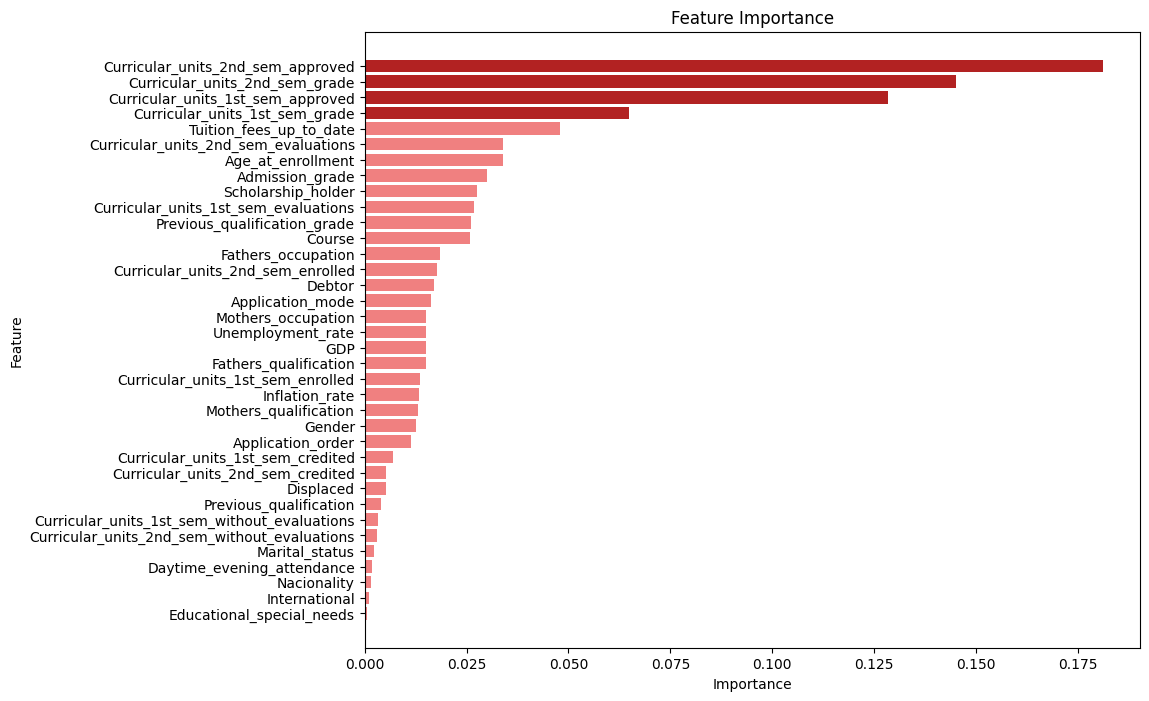

In [ ]:
show_fitur(rf, X_train, 0.05)

In [ ]:
X_train_fitur_1, X_test_fitur_1 = selected_feature(X_train, rf, 0.05)

Jumlah fitur yang dipilih: 4
Fitur yang dipilih:
- Curricular_units_1st_sem_grade
- Curricular_units_1st_sem_approved
- Curricular_units_2nd_sem_grade
- Curricular_units_2nd_sem_approved


#### Fitur 2: >0.025

Fitur ini akan diambil berdasarkan threshold score 0.025 dan digunakan sebagai kombinasi dataset fitur 2

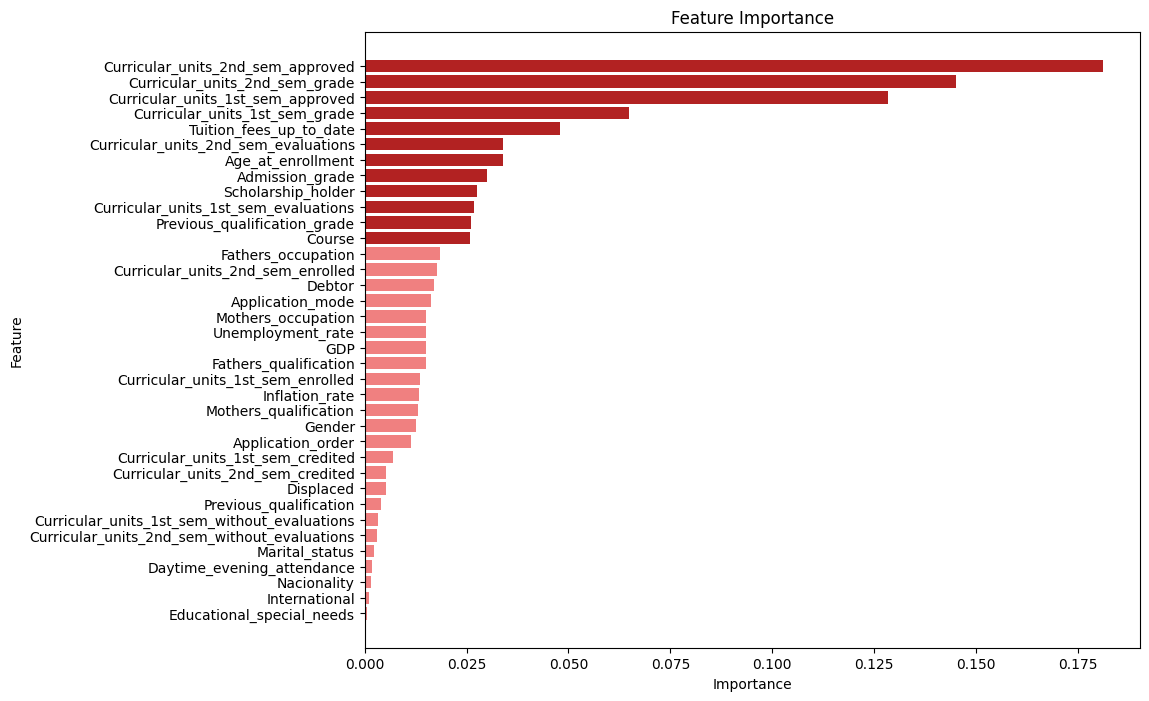

In [ ]:
show_fitur(rf, X_train, 0.025)

In [ ]:
X_train_fitur_2, X_test_fitur_2 = selected_feature(X_train, rf, 0.025)

Jumlah fitur yang dipilih: 12
Fitur yang dipilih:
- Course
- Previous_qualification_grade
- Curricular_units_1st_sem_evaluations
- Scholarship_holder
- Admission_grade
- Age_at_enrollment
- Curricular_units_2nd_sem_evaluations
- Tuition_fees_up_to_date
- Curricular_units_1st_sem_grade
- Curricular_units_1st_sem_approved
- Curricular_units_2nd_sem_grade
- Curricular_units_2nd_sem_approved


# Modeling

Proses modeling dilakukan ke 3 model dan 2 kombinasi dataset seleksi fitur, sehingga tercipta 6 skema pelatihan

## Decision tree

In [ ]:
def cv_decision_tree(X_data, y_data, data_name):
    dtc = DecisionTreeClassifier(random_state=42, class_weight="balanced")

    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(dtc, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_data, y_data)

    print(f'Data {data_name}')
    print("Best Parameters: ", grid_search.best_params_)
    print()

    best_dtc_model = grid_search.best_estimator_
    return best_dtc_model


In [ ]:
dtc_ori = cv_decision_tree(X_train, y_train, 'Ori')
dtc_fitur_1 = cv_decision_tree(X_train_fitur_1, y_train, 'fitur_1')
dtc_fitur_2 = cv_decision_tree(X_train_fitur_2, y_train, 'fitur_2')

Data Ori
Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Data fitur_1
Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Data fitur_2
Best Parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}



## Random Forest

In [ ]:

def cv_random_forest(X_data, y_data, data_name):
    rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_data, y_data)

    print(f'Data {data_name}')
    print("Best Parameters: ", grid_search.best_params_)
    print()

    best_rfc_model = grid_search.best_estimator_
    return best_rfc_model

In [ ]:
rf_ori = cv_random_forest(X_train, y_train, 'Ori')
rf_fitur_1 = cv_random_forest(X_train_fitur_1, y_train, 'fitur_1')
rf_fitur_2 = cv_random_forest(X_train_fitur_2, y_train, 'fitur_2')

Data Ori
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Data fitur_1
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Data fitur_2
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}



## XGBoost:

In [ ]:
def cv_xgboost(X_data, y_data, data_name):
    # Menghitung scale_pos_weight
    neg = sum(y_data == 0)
    pos = sum(y_data == 1)
    scale_pos_weight = neg / pos

    # Inisialisasi model XGBClassifier
    xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

    # Definisikan grid parameter yang akan diuji
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }

    # Inisialisasi GridSearchCV
    grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

    # Lakukan pencarian grid pada data pelatihan
    grid_search.fit(X_data, y_data)

    print(f'Data {data_name}')
    print("Best Parameters: ", grid_search.best_params_)
    print()

    best_xgb_model = grid_search.best_estimator_

    return best_xgb_model

In [ ]:
xgb_ori = cv_xgboost(X_train, y_train, 'Ori')
xgb_fitur_1 = cv_xgboost(X_train_fitur_1, y_train, 'fitur_1')
xgb_fitur_2 = cv_xgboost(X_train_fitur_2, y_train, 'fitur_2')

Data Ori
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 1.0}

Data fitur_1
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}

Data fitur_2
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}



# Evaluation

In [ ]:
def evaluasi_model(X_test, y_test, model, data_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f'{data_name}:')
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

    print()

    return acc, precision, recall, f1

## Decision Tree

In [ ]:
acc_dtc_ori, precision_dtc_ori, recall_dtc_ori, f1_dtc_ori = evaluasi_model(X_test, y_test, dtc_ori, 'DTC Ori')
acc_dtc_fitur_1, precision_dtc_fitur_1, recall_dtc_fitur_1, f1_dtc_fitur_1 = evaluasi_model(X_test_fitur_1, y_test, dtc_fitur_1, 'DTC fitur 1')
acc_dtc_fitur_2, precision_dtc_fitur_2, recall_dtc_fitur_2, f1_dtc_fitur_2 = evaluasi_model(X_test_fitur_2, y_test, dtc_fitur_2, 'DTC fitur 2')

DTC Ori:
Accuracy: 0.8966942148760331
Precision: 0.8955839514332574
Recall: 0.8862086546427889
F1-score: 0.8903215020213475
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       442
           1       0.89      0.84      0.86       284

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726


DTC fitur 1:
Accuracy: 0.8622589531680441
Precision: 0.8541287712475695
Recall: 0.8598161366388375
F1-score: 0.8566180827112218
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       442
           1       0.81      0.85      0.83       284

    accuracy                           0.86       726
   macro avg       0.85      0.86      0.86       726
weighted avg       0.86      0.86      0.86       726


DTC fitur 2:
Accuracy: 0.8966942148760331
Prec

## Random Forest

In [ ]:
acc_rf_ori, precision_rf_ori, recall_rf_ori, f1_rf_ori = evaluasi_model(X_test, y_test, rf_ori, 'RF Ori')
acc_rf_fitur_1, precision_rf_fitur_1, recall_rf_fitur_1, f1_rf_fitur_1 = evaluasi_model(X_test_fitur_1, y_test, rf_fitur_1, 'RF fitur 1')
acc_rf_fitur_2, precision_rf_fitur_2, recall_rf_fitur_2, f1_rf_fitur_2 = evaluasi_model(X_test_fitur_2, y_test, rf_fitur_2, 'RF fitur 2')

RF Ori:
Accuracy: 0.9201101928374655
Precision: 0.9191743327286861
Recall: 0.9123621821426295
F1-score: 0.9154756551901336
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       442
           1       0.92      0.88      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.92       726
weighted avg       0.92      0.92      0.92       726


RF fitur 1:
Accuracy: 0.8608815426997245
Precision: 0.853384589803077
Recall: 0.8555382066152571
F1-score: 0.8544157151451257
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       442
           1       0.82      0.83      0.82       284

    accuracy                           0.86       726
   macro avg       0.85      0.86      0.85       726
weighted avg       0.86      0.86      0.86       726


RF fitur 2:
Accuracy: 0.9132231404958677
Precisio

## XGBoost

In [ ]:
acc_xgb_ori, precision_xgb_ori, recall_xgb_ori, f1_xgb_ori = evaluasi_model(X_test, y_test, xgb_ori, 'XGB Ori')
acc_xgb_fitur_1, precision_xgb_fitur_1, recall_xgb_fitur_1, f1_xgb_fitur_1 = evaluasi_model(X_test_fitur_1, y_test, xgb_fitur_1, 'XGB fitur 1')
acc_xgb_fitur_2, precision_xgb_fitur_2, recall_xgb_fitur_2, f1_xgb_fitur_2 = evaluasi_model(X_test_fitur_2, y_test, xgb_fitur_2, 'XGB fitur 2')

XGB Ori:
Accuracy: 0.9256198347107438
Precision: 0.920752926289149
Recall: 0.923809827289529
F1-score: 0.9222099640456216
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       442
           1       0.90      0.92      0.91       284

    accuracy                           0.93       726
   macro avg       0.92      0.92      0.92       726
weighted avg       0.93      0.93      0.93       726


XGB fitur 1:
Accuracy: 0.8608815426997245
Precision: 0.853384589803077
Recall: 0.8555382066152571
F1-score: 0.8544157151451257
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       442
           1       0.82      0.83      0.82       284

    accuracy                           0.86       726
   macro avg       0.85      0.86      0.85       726
weighted avg       0.86      0.86      0.86       726


XGB fitur 2:
Accuracy: 0.9077134986225895
Precisi

## Best Model

In [ ]:
def plot_evaluasi(dataframe):
  df_ori = dataframe

  # Warna yang berbeda tapi tetap satu tone dan lembut
  colors = ['black', 'lightcoral', 'red', 'darkred']
  alpha_values = [0.4, 1]

  # Batas atas sumbu y
  y_upper_limit = 1.1

  # Bar chart
  barWidth = 0.15
  space = 0.02  # Jarak antara grup bar

  r1 = np.arange(len(df_ori['dataset']))
  r2 = [x + barWidth + space for x in r1]
  r3 = [x + barWidth + space for x in r2]
  r4 = [x + barWidth + space for x in r3]

  plt.bar(r1, df_ori['accuracy'], color=colors[0], alpha=alpha_values[0], width=barWidth, edgecolor='none', linewidth=0, label='Accuracy')
  plt.bar(r2, df_ori['precision'], color=colors[1], alpha=alpha_values[1], width=barWidth, edgecolor='none', linewidth=0, label='Precision')
  plt.bar(r3, df_ori['recall'], color=colors[2], alpha=alpha_values[1], width=barWidth, edgecolor='none', linewidth=0, label='Recall')
  plt.bar(r4, df_ori['f1 score'], color=colors[3], alpha=alpha_values[1], width=barWidth, edgecolor='none', linewidth=0, label='F1-Score')

  # Menambahkan nilai di atas setiap bar dengan rotasi 90 derajat ke kiri
  for i, val in enumerate(df_ori['accuracy']):
      plt.text(r1[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

  for i, val in enumerate(df_ori['precision']):
      plt.text(r2[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

  for i, val in enumerate(df_ori['recall']):
      plt.text(r3[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')

  for i, val in enumerate(df_ori['f1 score']):
      plt.text(r4[i], min(val + 0.01, y_upper_limit), round(val, 3), rotation=90, ha='center', va='bottom')


  # Label dan legend horizontal di atas bar
  plt.xlabel('')
  plt.xticks([r + (barWidth*4/2) - space for r in range(len(df_ori['dataset']))], df_ori['dataset'], rotation=45)
  plt.yticks([])  # Sembunyikan ticks pada sumbu y
  plt.ylim(0, y_upper_limit)  # Set batas atas sumbu y
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=4)  # Atur legenda di atas bar
  plt.title(f'Evaluasi Model')

  # Tampilkan plot
  plt.tight_layout()
  plt.show()


In [ ]:
# Nama dataset dan jenis fitur
dataset = ['DTC Ori', 'DTC fitur 1', 'DTC fitur 2', 'RF Ori', 'RF fitur 1', 'RF fitur 2', 'XGB Ori', 'XGB fitur 1', 'XGB fitur 2']

# Nilai metrik evaluasi untuk setiap model
accuracy = [acc_dtc_ori, acc_dtc_fitur_1, acc_dtc_fitur_2, acc_rf_ori, acc_rf_fitur_1, acc_rf_fitur_2, acc_xgb_ori, acc_xgb_fitur_1, acc_xgb_fitur_2]
precision = [precision_dtc_ori, precision_dtc_fitur_1, precision_dtc_fitur_2, precision_rf_ori, precision_rf_fitur_1, precision_rf_fitur_2, precision_xgb_ori, precision_xgb_fitur_1, precision_xgb_fitur_2]
recall = [recall_dtc_ori, recall_dtc_fitur_1, recall_dtc_fitur_2, recall_rf_ori, recall_rf_fitur_1, recall_rf_fitur_2, recall_xgb_ori, recall_xgb_fitur_1, recall_xgb_fitur_2]
f1_score = [f1_dtc_ori, f1_dtc_fitur_1, f1_dtc_fitur_2, f1_rf_ori, f1_rf_fitur_1, f1_rf_fitur_2, f1_xgb_ori, f1_xgb_fitur_1, f1_xgb_fitur_2]

In [ ]:
result = {'dataset': dataset,
          'accuracy': accuracy,
          'precision': precision,
          'recall': recall,
          'f1 score': f1_score}

df_result = pd.DataFrame(result)
df_result

,dataset,accuracy,precision,recall,f1 score
0,DTC Ori,0.896694,0.895584,0.886209,0.890322
1,DTC fitur 1,0.862259,0.854129,0.859816,0.856618
2,DTC fitur 2,0.896694,0.893437,0.888726,0.890923
3,RF Ori,0.920110,0.919174,0.912362,0.915476
4,RF fitur 1,0.860882,0.853385,0.855538,0.854416
5,RF fitur 2,0.913223,0.910998,0.906077,0.908375
6,XGB Ori,0.925620,0.920753,0.923810,0.922210
7,XGB fitur 1,0.860882,0.853385,0.855538,0.854416
8,XGB fitur 2,0.907713,0.902247,0.904699,0.903424


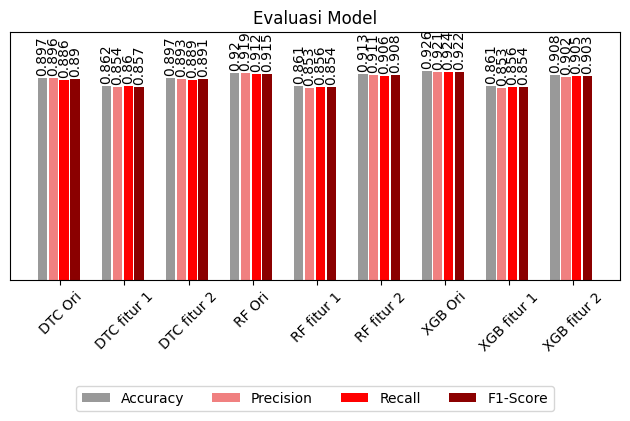

In [ ]:
plot_evaluasi(df_result)

Karena data imbalance, penilaian model terbaik dilihat berdasarkan f1 score tertingg. Model yang mendapatkan f1 score tertinggi adalah XGB dengan dataset original.

Namun untuk pemakaian dengan inputan simpel tidak melibatkan banyak fitur, maka dipilih model dengan kombinasi fitur terbaik yaitu RF fitur 2.

# Save Source to Prototype w. Streamlite

## Model

In [ ]:
model = rf_fitur_2

In [ ]:
# Menyimpan model_rf_fitur_2 ke file joblib
joblib.dump(model, 'model_rf_fitur_2.joblib')

['model_rf_fitur_2.joblib']

## Maping Kategorikal

In [ ]:
mapping = {
    "course_mapping": {
        "33": "Biofuel Production Technologies",
        "171": "Animation and Multimedia Design",
        "8014": "Social Service (evening attendance)",
        "9003": "Agronomy",
        "9070": "Communication Design",
        "9085": "Veterinary Nursing",
        "9119": "Informatics Engineering",
        "9130": "Equinculture",
        "9147": "Management",
        "9238": "Social Service",
        "9254": "Tourism",
        "9500": "Nursing",
        "9556": "Oral Hygiene",
        "9670": "Advertising and Marketing Management",
        "9773": "Journalism and Communication",
        "9853": "Basic Education",
        "9991": "Management (evening attendance)"
    },
    "previous_qualification_mapping": {
        "1": "Secondary education",
        "2": "Higher education - bachelor's degree",
        "3": "Higher education - degree",
        "4": "Higher education - master's",
        "5": "Higher education - doctorate",
        "6": "Frequency of higher education",
        "9": "12th year of schooling - not completed",
        "10": "11th year of schooling - not completed",
        "12": "Other - 11th year of schooling",
        "14": "10th year of schooling",
        "15": "10th year of schooling - not completed",
        "19": "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        "38": "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
        "39": "Technological specialization course",
        "40": "Higher education - degree (1st cycle)",
        "42": "Professional higher technical course",
        "43": "Higher education - master (2nd cycle)"
    },
    "scholarship_holder_mapping": {
        "1": "Yes",
        "0": "No"
    },
    "tuition_fees_up_to_date_mapping": {
        "1": "Yes",
        "0": "No"
    },
    "status_mapping": {
        "1": "Dropout",
        "0": "Graduate"
    },
}

In [ ]:
with open('mapping.json', 'w') as json_file:
    json.dump(mapping, json_file)

# Save Dataset to Dashboard

In [ ]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [ ]:
# mengambil data df hanay akolom X_train_fitur_2 + status
fitur_2_col = X_train_fitur_2.columns.tolist()
fitur_2_col.append('Status')
fitur_2_col

['Course',
 'Previous_qualification_grade',
 'Curricular_units_1st_sem_evaluations',
 'Scholarship_holder',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_2nd_sem_evaluations',
 'Tuition_fees_up_to_date',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_approved',
 'Status']

In [ ]:
df_dashboard = df[fitur_2_col]
df_dashboard

,Course,Previous_qualification_grade,Curricular_units_1st_sem_evaluations,Scholarship_holder,Admission_grade,Age_at_enrollment,Curricular_units_2nd_sem_evaluations,Tuition_fees_up_to_date,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved,Status
0,171,122.0,0,0,127.3,20,0,1,0.000000,0,0.000000,0,1
1,9254,160.0,6,0,142.5,19,6,0,14.000000,6,13.666667,6,0
2,9070,122.0,0,0,124.8,19,0,0,0.000000,0,0.000000,0,1
3,9773,122.0,8,0,119.6,20,10,1,13.428571,6,12.400000,5,0
4,8014,100.0,9,0,141.5,45,6,1,12.333333,5,13.000000,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,9773,125.0,7,0,122.2,19,8,1,13.600000,5,12.666667,5,0
4420,9773,120.0,6,0,119.0,18,6,0,12.000000,6,11.000000,2,1
4421,9500,154.0,8,1,149.5,30,9,1,14.912500,7,13.500000,1,1
4422,9147,180.0,5,1,153.8,20,6,1,13.800000,5,12.000000,5,0


In [ ]:
# Apply mappings to the DataFrame
df_dashboard['Course'] = df_dashboard['Course'].astype(str).map(mapping['course_mapping'])
df_dashboard['Scholarship_holder'] = df_dashboard['Scholarship_holder'].astype(str).map(mapping['scholarship_holder_mapping'])
df_dashboard['Tuition_fees_up_to_date'] = df_dashboard['Tuition_fees_up_to_date'].astype(str).map(mapping['tuition_fees_up_to_date_mapping'])
df_dashboard['Status'] = df_dashboard['Status'].astype(str).map(mapping['status_mapping'])


<ipython-input-43-c3cabf518ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dashboard['Course'] = df_dashboard['Course'].astype(str).map(mapping['course_mapping'])
<ipython-input-43-c3cabf518ef4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dashboard['Scholarship_holder'] = df_dashboard['Scholarship_holder'].astype(str).map(mapping['scholarship_holder_mapping'])
<ipython-input-43-c3cabf518ef4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
df_dashboard

,Course,Previous_qualification_grade,Curricular_units_1st_sem_evaluations,Scholarship_holder,Admission_grade,Age_at_enrollment,Curricular_units_2nd_sem_evaluations,Tuition_fees_up_to_date,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved,Status
0,Animation and Multimedia Design,122.0,0,No,127.3,20,0,Yes,0.000000,0,0.000000,0,Dropout
1,Tourism,160.0,6,No,142.5,19,6,No,14.000000,6,13.666667,6,Graduate
2,Communication Design,122.0,0,No,124.8,19,0,No,0.000000,0,0.000000,0,Dropout
3,Journalism and Communication,122.0,8,No,119.6,20,10,Yes,13.428571,6,12.400000,5,Graduate
4,Social Service (evening attendance),100.0,9,No,141.5,45,6,Yes,12.333333,5,13.000000,6,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Journalism and Communication,125.0,7,No,122.2,19,8,Yes,13.600000,5,12.666667,5,Graduate
4420,Journalism and Communication,120.0,6,No,119.0,18,6,No,12.000000,6,11.000000,2,Dropout
4421,Nursing,154.0,8,Yes,149.5,30,9,Yes,14.912500,7,13.500000,1,Dropout
4422,Management,180.0,5,Yes,153.8,20,6,Yes,13.800000,5,12.000000,5,Graduate


In [ ]:
# melakukan round untuk data folat menjadi rou
df_dashboard.round(1)

,Course,Previous_qualification_grade,Curricular_units_1st_sem_evaluations,Scholarship_holder,Admission_grade,Age_at_enrollment,Curricular_units_2nd_sem_evaluations,Tuition_fees_up_to_date,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved,Status
0,Animation and Multimedia Design,122.0,0,No,127.3,20,0,Yes,0.0,0,0.0,0,Dropout
1,Tourism,160.0,6,No,142.5,19,6,No,14.0,6,13.7,6,Graduate
2,Communication Design,122.0,0,No,124.8,19,0,No,0.0,0,0.0,0,Dropout
3,Journalism and Communication,122.0,8,No,119.6,20,10,Yes,13.4,6,12.4,5,Graduate
4,Social Service (evening attendance),100.0,9,No,141.5,45,6,Yes,12.3,5,13.0,6,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Journalism and Communication,125.0,7,No,122.2,19,8,Yes,13.6,5,12.7,5,Graduate
4420,Journalism and Communication,120.0,6,No,119.0,18,6,No,12.0,6,11.0,2,Dropout
4421,Nursing,154.0,8,Yes,149.5,30,9,Yes,14.9,7,13.5,1,Dropout
4422,Management,180.0,5,Yes,153.8,20,6,Yes,13.8,5,12.0,5,Graduate


In [ ]:
df_dashboard.to_csv('data_dashboard.csv', index=False, float_format='%.1f')